In [1]:
import pandas as pd

df = pd.read_csv('./data/book_sales.csv',
                index_col='Date',
                parse_dates=['Date'],
                ).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


### Linear Regression with Time Series
- 선형 회귀 알고리즘으로 시계열 모델을 만들것이다.
- target = weight_1 * feature_1 + weight_2 * feature_2 + bias


In [2]:
import numpy as np
df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


C:\Users\user\AppData\Local\Temp\ipykernel_1968\2594472845.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

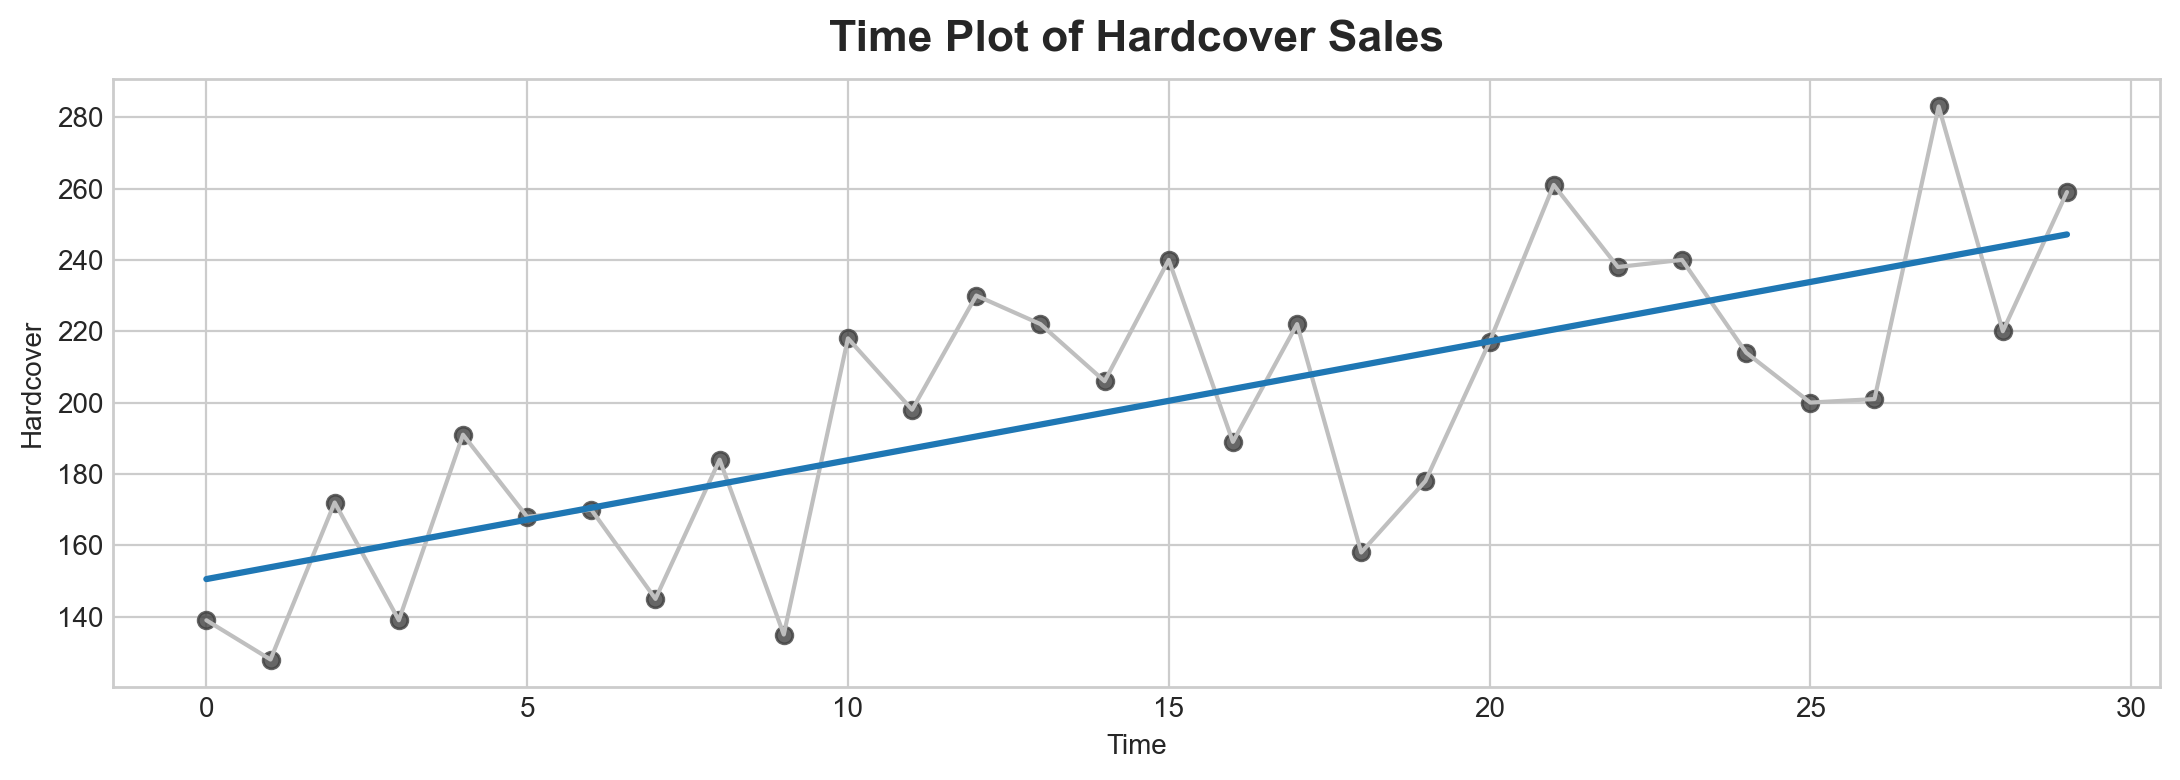

In [3]:
'''타임더미와 함께 선형회귀는 모델을 생성한다.
target = weight * time + bias
time forms the x-axis.
'''

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout = True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold',
)

plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10,
    )
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data = df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws = dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales')

- Time-step features let you model time dependence.
- A series is time dependent if its values can be predicted from the time they occured.m



### Lag features
- shift 써서 전날 것을 가져오기

In [4]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns = ['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


- Linear regression with lag feature가 모델을 만든다.
- target = weight * lag + bias



Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

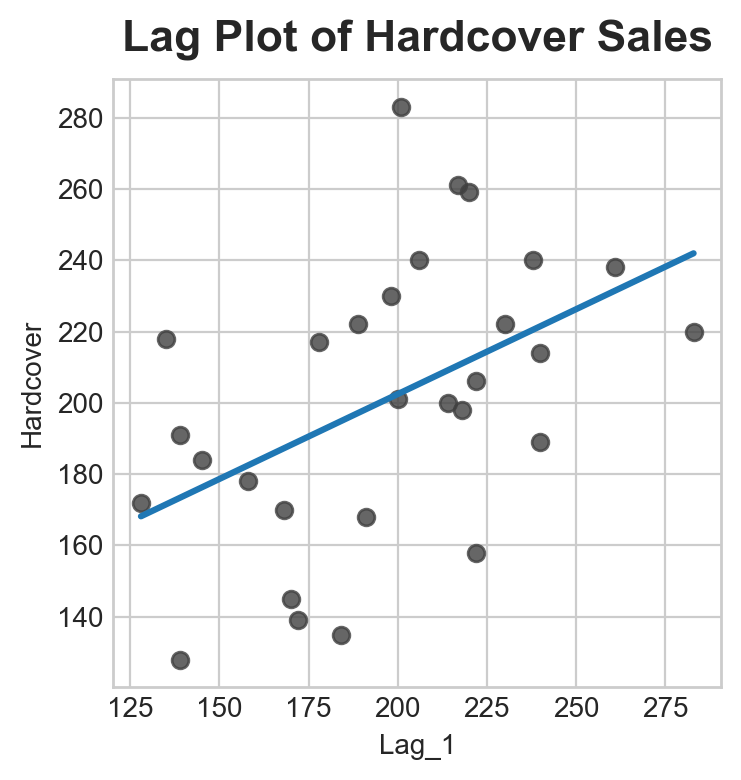

In [5]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

- 상관관계가 우상향 한다.

In [6]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore') # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(11,4))
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10,
)

plot_params = dict(
    color='0.75',
    style='.-',
    markeredgecolor='0.25',
    markerfacecolor='0.25',
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

tunnel = pd.read_csv('./data/tunnel.csv', parse_dates=['Day'])
# tunnel = tunnel.to_period()

tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


Time-step feature
- 결측치가 없기 때문에 time dummy를 시리즈 길이를 세서 만들 수 있다

In [7]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4


 사이킷런을 사용해 선형회귀 모델 학습시키는 과정

In [8]:
from sklearn.linear_model import LinearRegression

# Traning data
X = df.loc[:, ['Time']] # features
y = df.loc[:, 'NumVehicles'] # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index= X.index)

In [9]:
y

0      103536
1       92051
2      100795
3      102352
4      106569
        ...  
742    104646
743     94424
744    112165
745    114296
746    114690
Name: NumVehicles, Length: 747, dtype: int64

- Lag feature

In [10]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,Day,NumVehicles,Time,Lag_1
0,2003-11-01,103536,0,NaN
1,2003-11-02,92051,1,103536.0
2,2003-11-03,100795,2,92051.0
3,2003-11-04,102352,3,100795.0
4,2003-11-05,106569,4,102352.0


- lag 변수를 만들때, 우리는 결측치 생기는 것 어떻게할지 결정할 필요가 있다.
- 

In [11]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True) # drop missing values in the feature set
y = df.loc[:, 'NumVehicles'] 
y, X = y.align(X, join='inner') # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index= X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

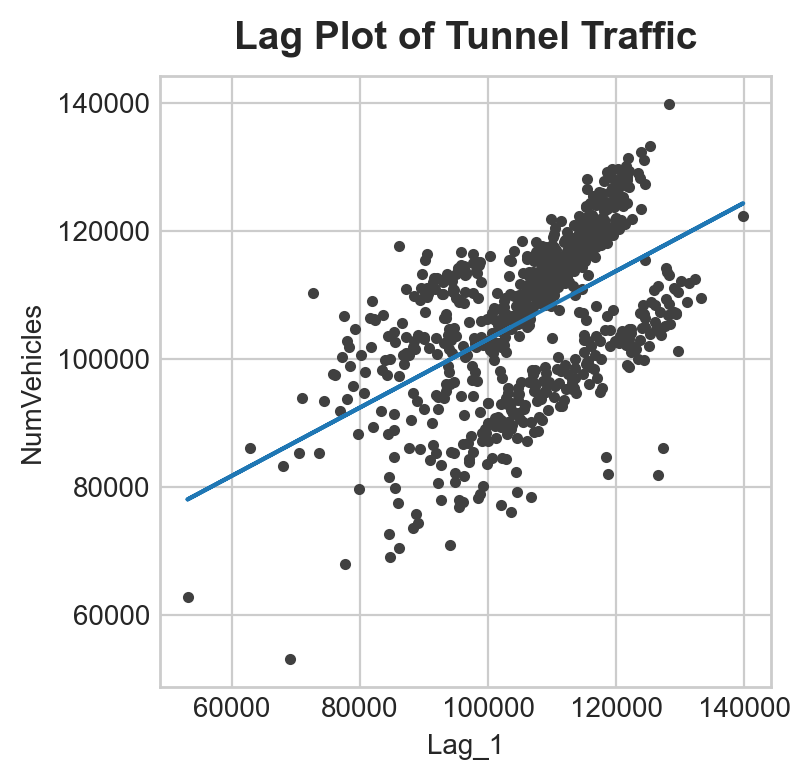

In [12]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

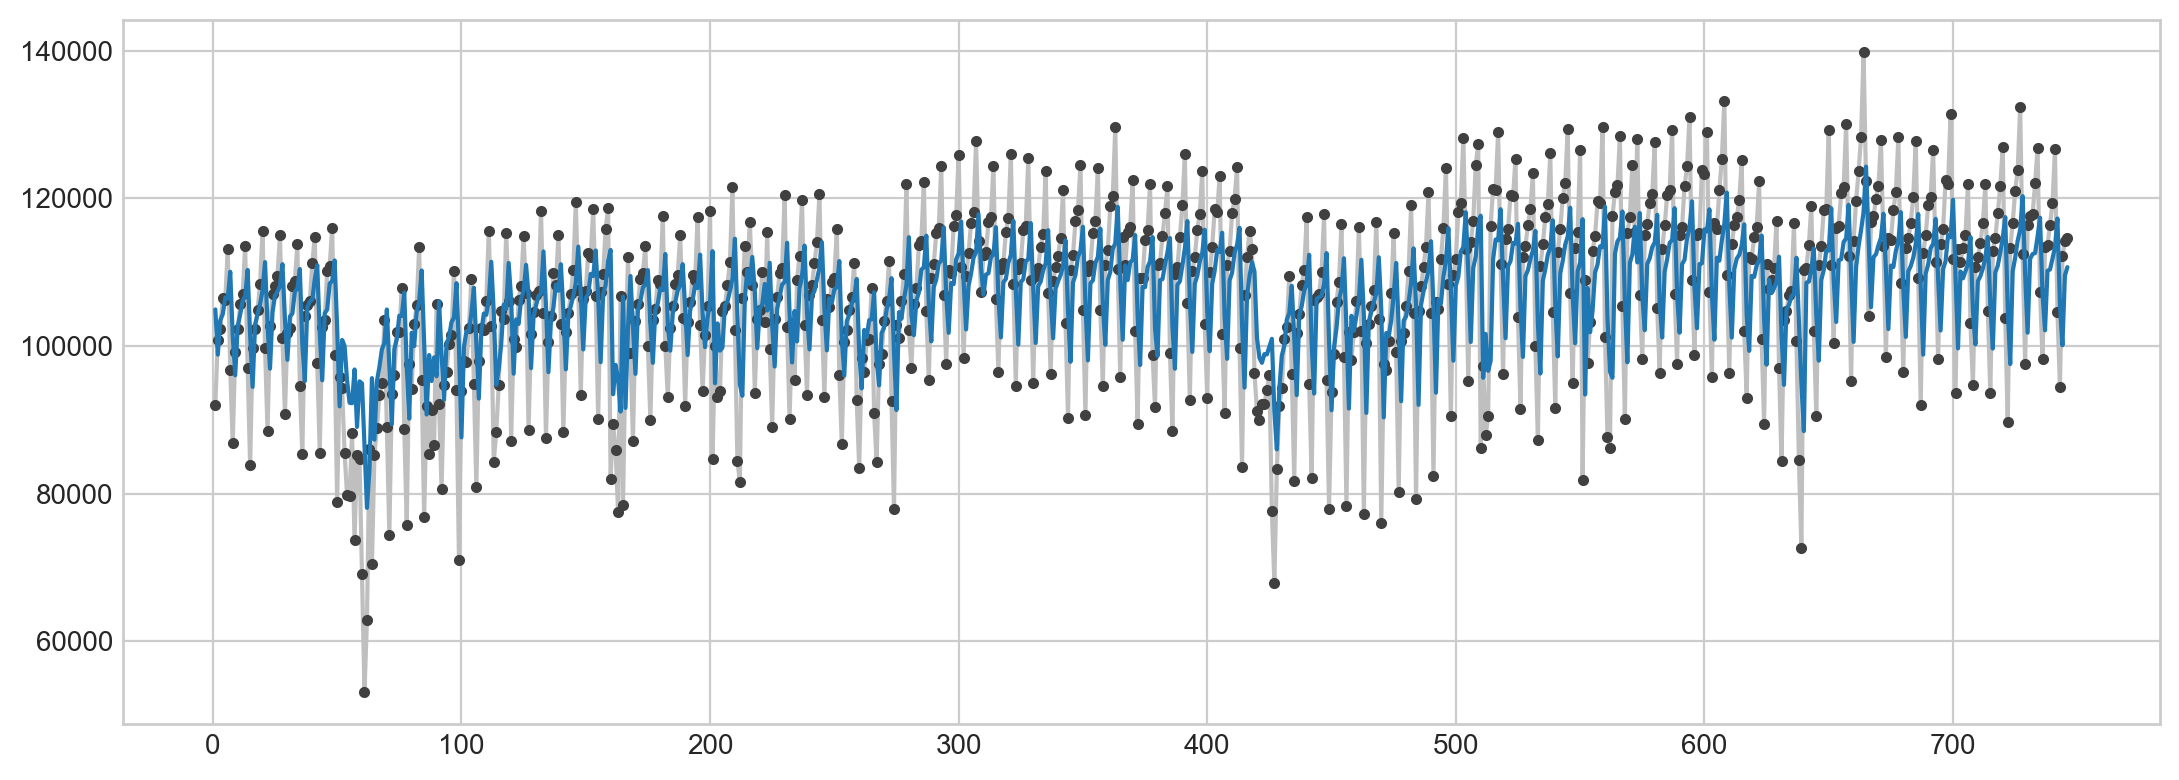

In [13]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

### Trend
- 시계열의 Trend 요소는 지속적이고, long-term 변화이다. 시계열 평균에서.
- 추세는 시리즈의 느리고 천천히 움직이는 부분, 시간 규모의 가장 넓은 부분을 대표한다.
- 지속적이고 천천히 움직이는 시계열적 변화가 trend를 의미 


Moving Average Plots
- trend를 시각화 하기 위해, 시계열에서의 어느 다른 계절성 기간보다 더 긴 기간을 평균내야한다. 
- 예를들면 12사이즈를 윈도우로 설정하고 smoothing 하는 것처럼

Engineering Trend
- 우리가 trend의 형태를 알아챘다면, 우리는 그것을 모델에 사용한다. time-step feature로 사용하면서.
- 우리는 이미 time dummy 그자체를 사용하는 것이 linear trend를 모델링 하는 것을 봐왔다.
- target = a * time+b
- 우리는 time dummy의 다양한 변형을 통해 다양한 트렌드를 만들수있다.



In [14]:
# trend model 만들기
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv("./data/tunnel.csv", parse_dates=["Day"])
# tunnel = tunnel.set_index("Day").to_period()

<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}>

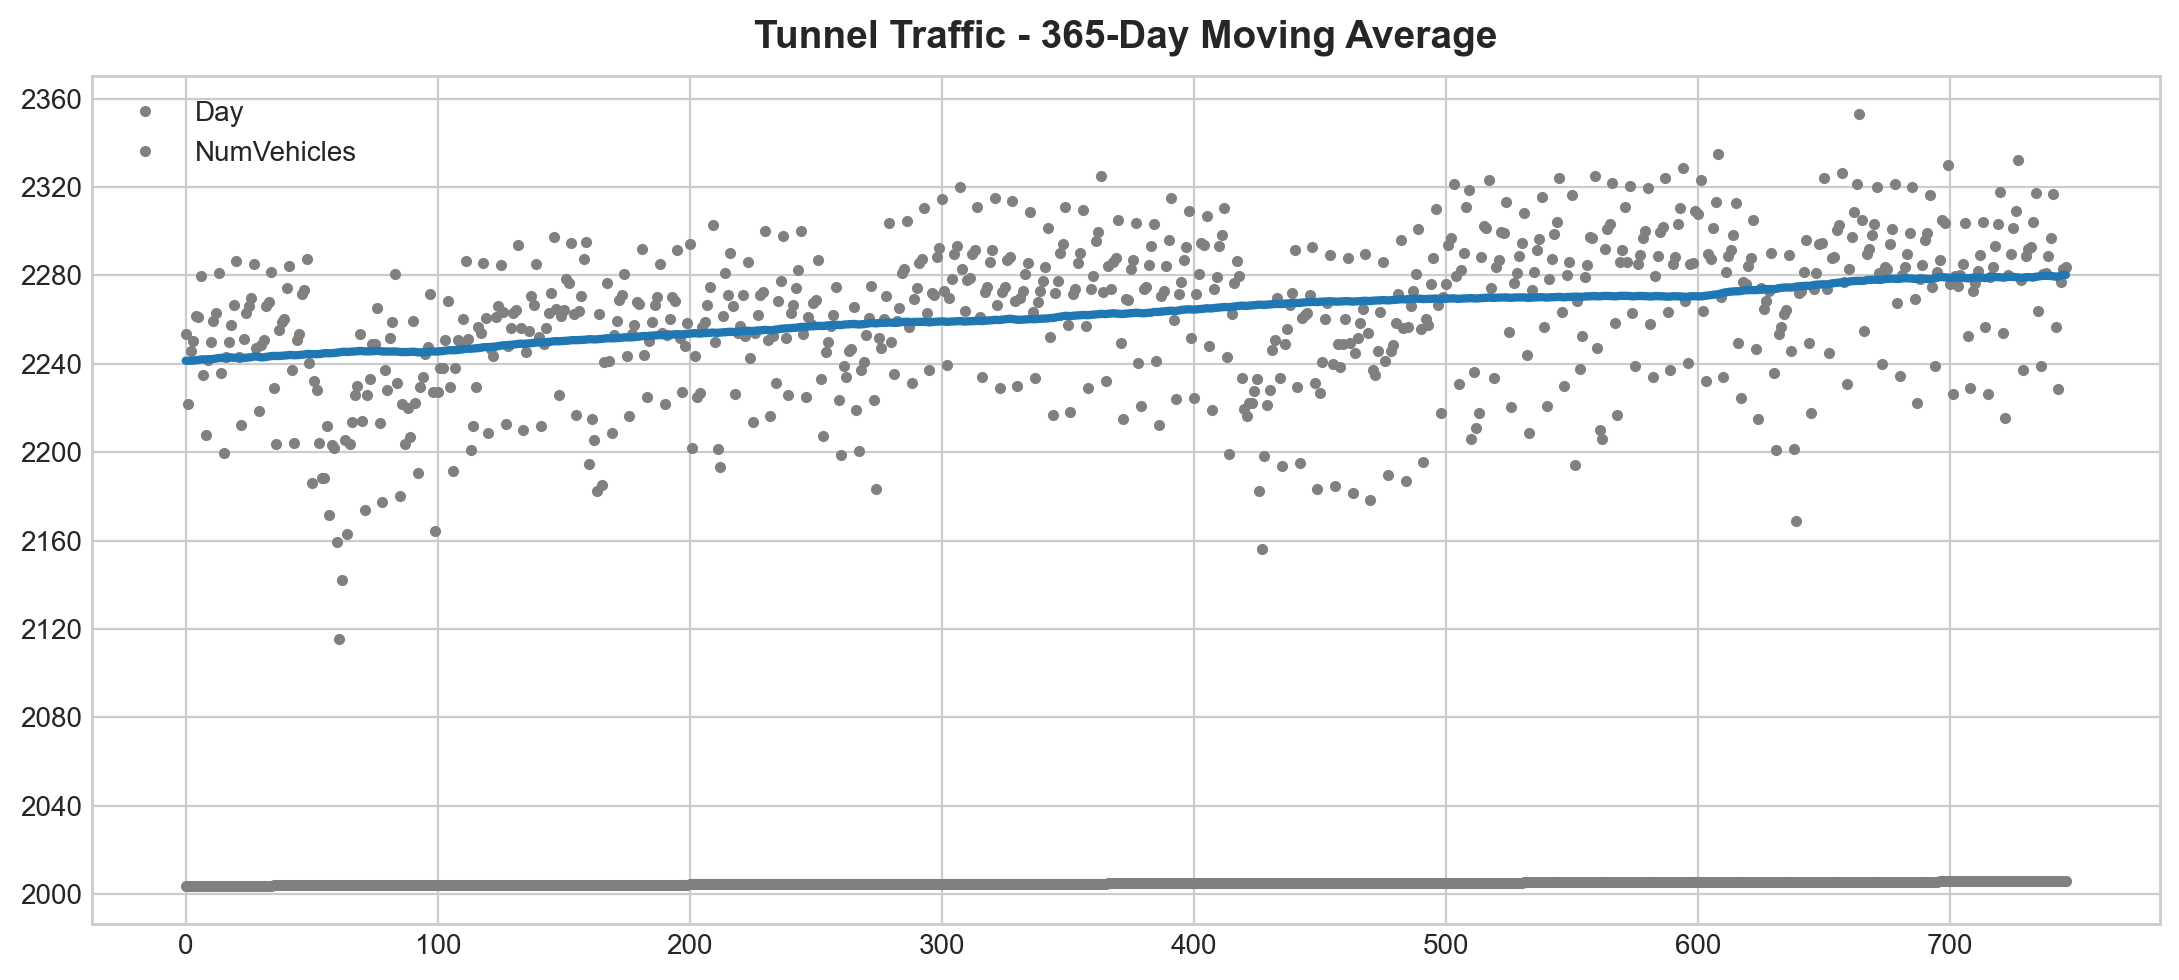

In [15]:
moving_average = tunnel.rolling(
    window = 365, # 365-day window
    center = True, # puts the average at the center of the window
    min_periods=183, # choose about halt the window size
).mean()

ax = tunnel.plot(style='.', color='0.5')
moving_average.plot(
    ax=ax, linewidth=3, title='Tunnel Traffic - 365-Day Moving Average',legend=False,
)

- 아까는 판다스에서 직접 time dummy를 만들었다.
- 지금부터는 statsmodels의 DeterministicProcess를 사용할 것이다.
- 'order' 는 다항식 개수?

In [16]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index = tunnel.index, # dates from the training data
    constant = True, # dummy feature for the bias (y_intercept)
    order = 1, # the time dummy(trend)
    drop=True,
)

# 'in_sample' 은 features를 만든다. index에 주어진 데이트를 위한.
X = dp.in_sample()

X.head()

,const,trend
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0


- 그러나 DeterministicProcess는 non-random 하고 완전히 결정된 시계열을 위한 기술적 용어이다.(마치 const와 trend 같은)
- 시간 인덱스로부터 파생된 변수들은 아마 deterministic 할것이다.
- 우리는 우리의 trend 모델을 만들것이다. fit_intercept =False 를 통해

In [17]:
from sklearn.linear_model import LinearRegression

y = tunnel['NumVehicles'] # target

# The intercept 는 'const' feature가 같다.
# DeterministicProcess. LinearRegression은 중복된 상황에서 안좋게 작동한다.
# features, 우리는 그것을 제외할 필요가 있다.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

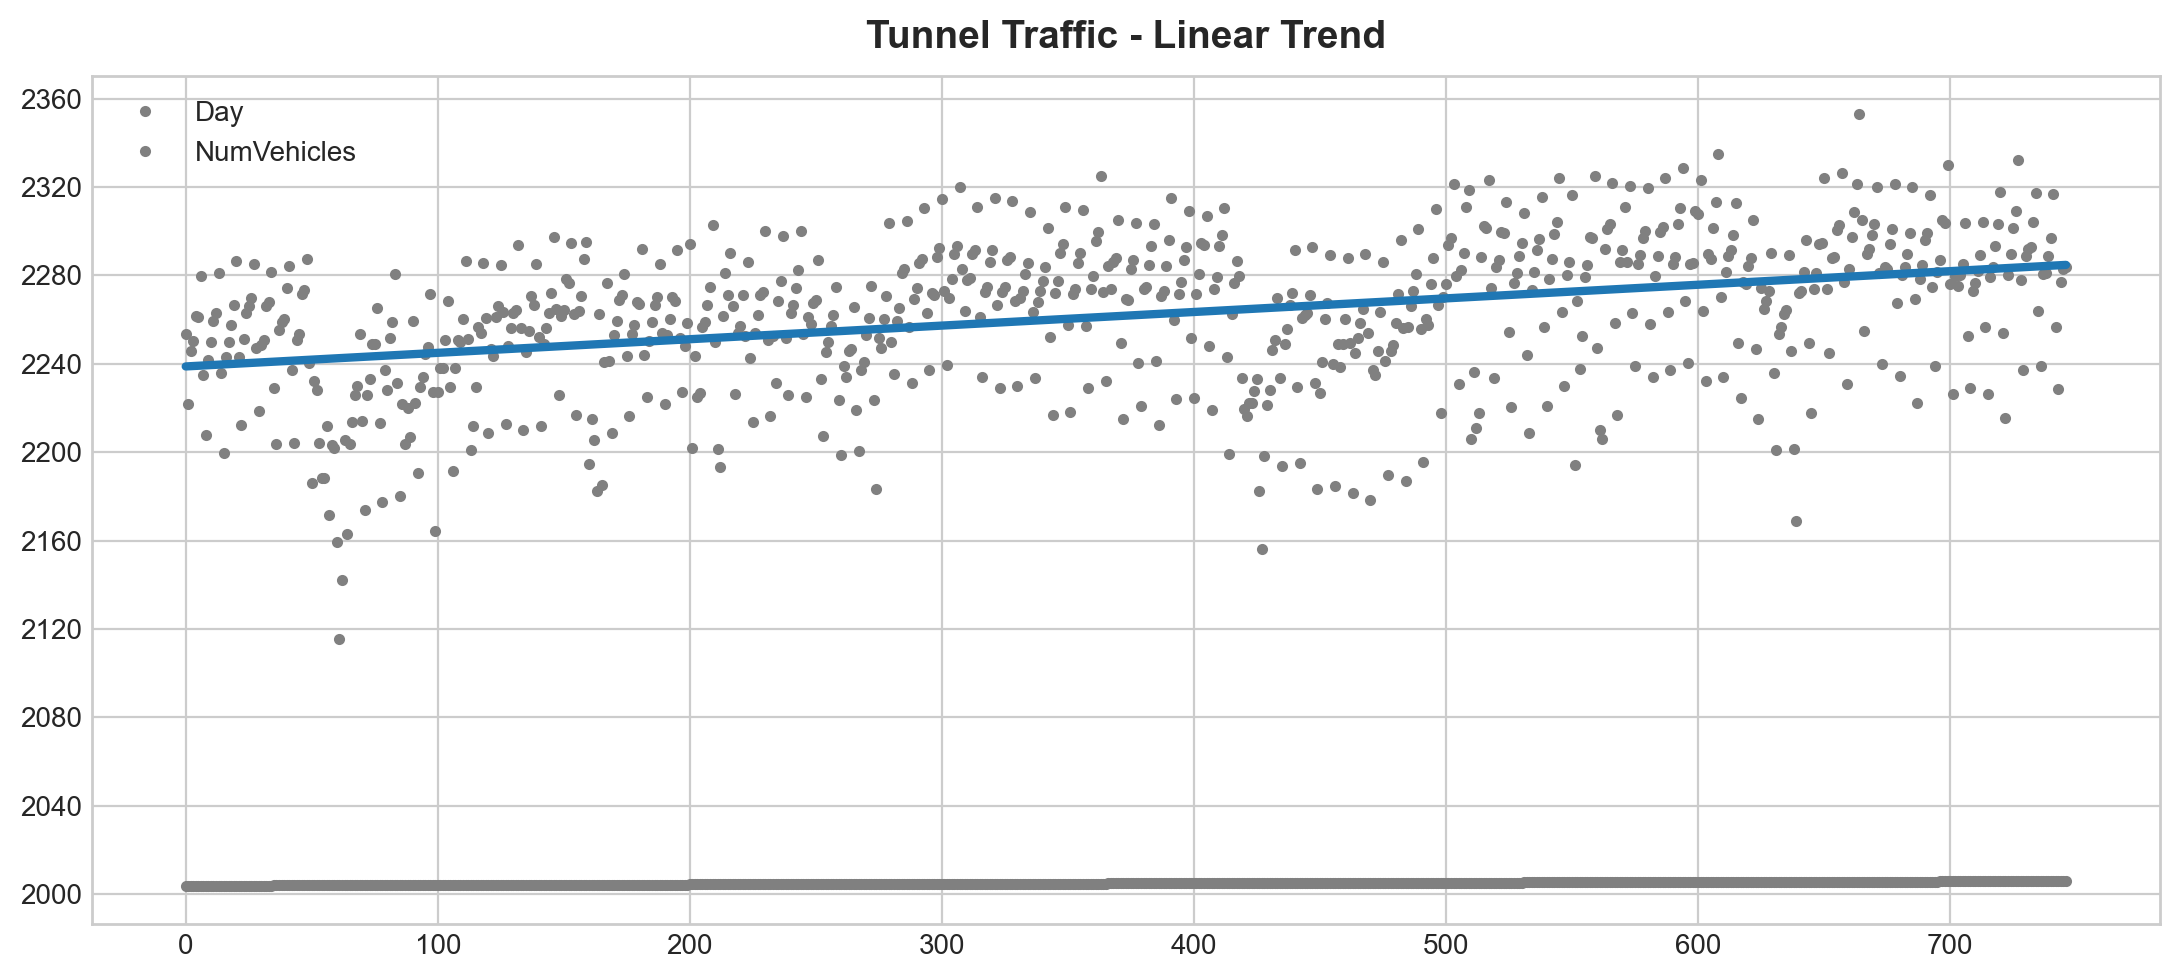

In [18]:
ax = tunnel.plot(style='.', color = '0.5', title='Tunnel Traffic - Linear Trend')
_ = y_pred.plot(ax=ax, linewidth=3, label='Trend')

- 예측을 위해, 우리는 우리의 모델에 'out of sample' features를 적용한다.
- Out of sample은 학습 데이터의 관측된 기간 밖의 시간을 의미한다.
- 아래 코드는 30일의 예측을 만드는 방식이다.

In [19]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X), index = X.index)
y_fore

747    114981.801146
748    115004.298595
749    115026.796045
750    115049.293494
751    115071.790944
752    115094.288393
753    115116.785843
754    115139.283292
755    115161.780742
756    115184.278191
757    115206.775641
758    115229.273090
759    115251.770540
760    115274.267990
761    115296.765439
762    115319.262889
763    115341.760338
764    115364.257788
765    115386.755237
766    115409.252687
767    115431.750136
768    115454.247586
769    115476.745035
770    115499.242485
771    115521.739934
772    115544.237384
773    115566.734833
774    115589.232283
775    115611.729733
776    115634.227182
dtype: float64

In [20]:
# ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
# ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
# ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
# _ = ax.legend()

### Seasonality
- regular, periodic change
- Seasonal indicators : 이진 변수다(계절성 차이를 나타내는)


In [21]:
import numpy as np

def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2* np.pi * (1/freq)*time
    features = {}
    for i in range(1, order+1):
        features.update({
            f"sin_{freq}_{i}":np.sin(i*k),
            f"cos_{freq}_{i}":np.cos(i*k),
        })
    return pd.DataFrame(features, index=index)

In [22]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


# data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv("./data/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

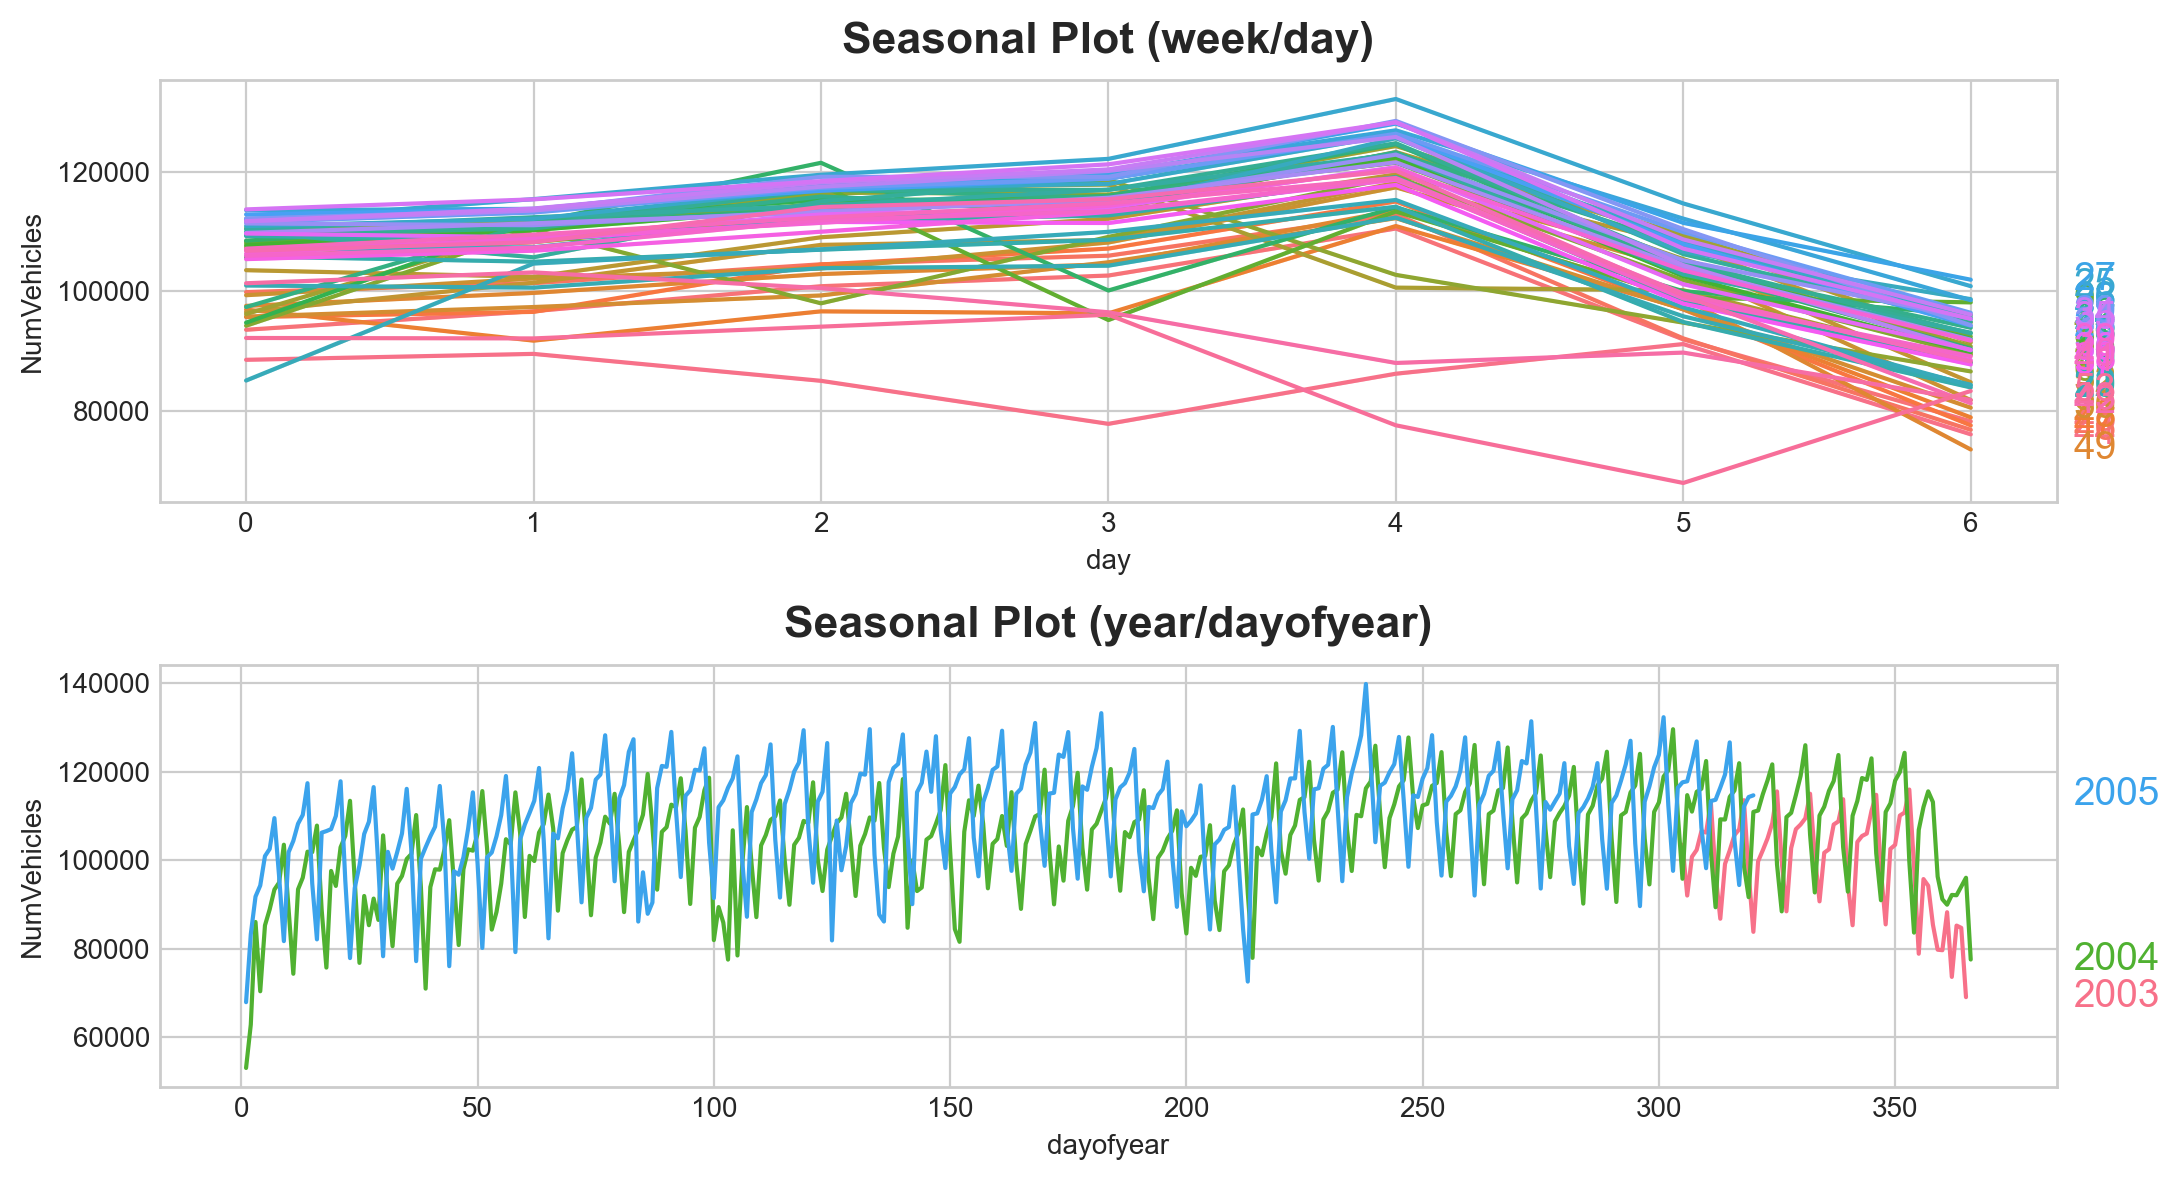

In [23]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

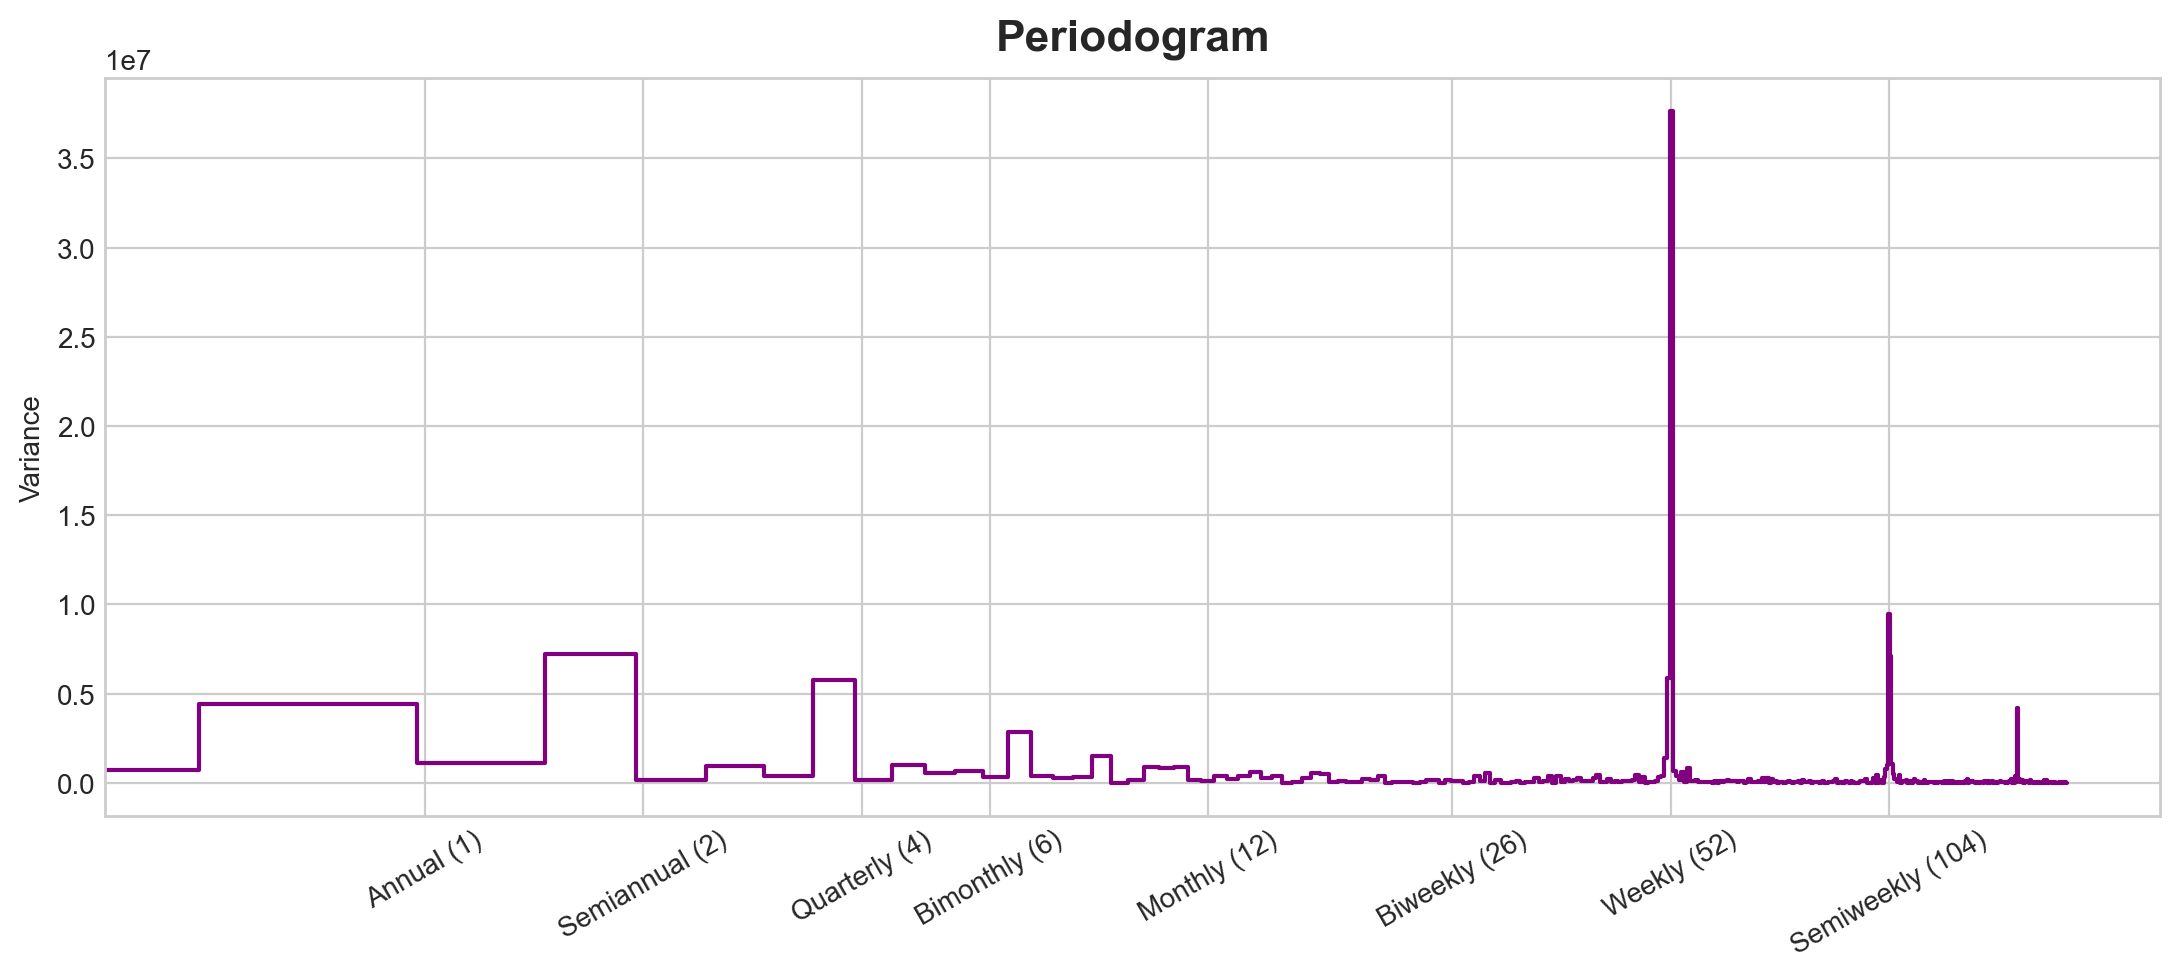

In [24]:
plot_periodogram(tunnel.NumVehicles);

In [25]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

In [26]:
X

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)",...,"sin(6,freq=A-DEC)","cos(6,freq=A-DEC)","sin(7,freq=A-DEC)","cos(7,freq=A-DEC)","sin(8,freq=A-DEC)","cos(8,freq=A-DEC)","sin(9,freq=A-DEC)","cos(9,freq=A-DEC)","sin(10,freq=A-DEC)","cos(10,freq=A-DEC)"
Day,,,,,,,,,,,,,,,,,,,,,
2003-11-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.867456,0.497513,...,-0.017213,0.999852,-0.875892,0.482508,-0.854322,-0.519744,0.025818,-0.999667,0.880012,-0.474951
2003-11-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.858764,0.512371,...,0.085965,0.996298,-0.811539,0.584298,-0.917584,-0.397543,-0.128748,-0.991677,0.785650,-0.618671
2003-11-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.849817,0.527078,...,0.188227,0.982126,-0.735417,0.677615,-0.963471,-0.267814,-0.280231,-0.959933,0.668064,-0.744104
2003-11-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.840618,0.541628,...,0.288482,0.957485,-0.648630,0.761104,-0.991114,-0.133015,-0.425000,-0.905193,0.530730,-0.847541
2003-11-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.831171,0.556017,...,0.385663,0.922640,-0.552435,0.833556,-0.999991,0.004304,-0.559589,-0.828770,0.377708,-0.925925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-11-12,1.0,743.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.758306,0.651899,...,0.899631,0.436651,0.255353,0.966848,-0.566702,0.823923,-0.994218,0.107381,-0.729558,-0.683919
2005-11-13,1.0,744.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.746972,0.664855,...,0.939856,0.341571,0.369725,0.929141,-0.448229,0.893919,-0.965740,0.259512,-0.835925,-0.548843
2005-11-14,1.0,745.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.735417,0.677615,...,0.970064,0.242850,0.478734,0.877960,-0.321270,0.946988,-0.914128,0.405426,-0.917584,-0.397543


In [28]:
# X_fore

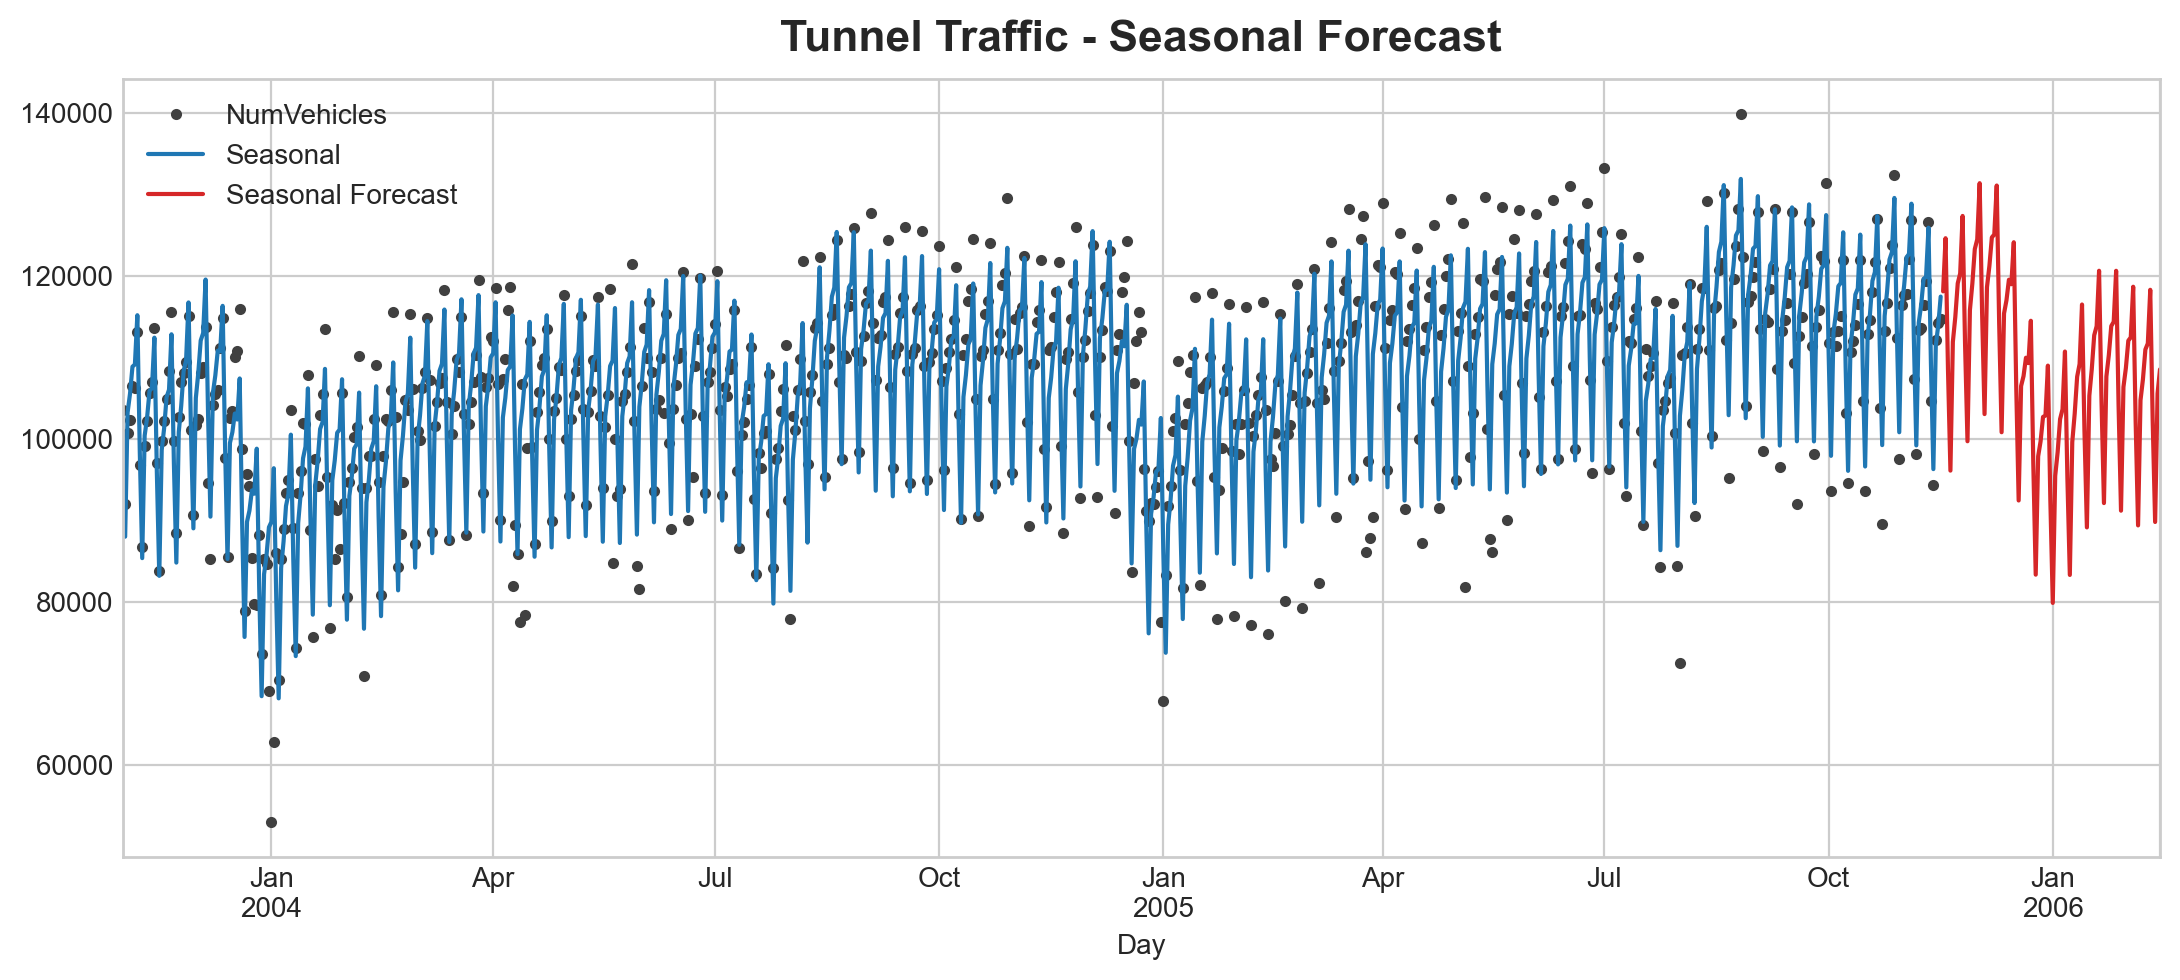

In [29]:
y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

In [30]:
tunnel

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


### Serial Dependence
- 시간 의존적인 특성을 만들었다.(time index에서 비롯된)


### Cycles
- Serial dependence를 명확히 하는 가장 주된 방법 중 하나가 cycle이다
- Cyclic behavior는 시스템의 특성이다. 그들 자신이나 누구의 리엑션이 계속해서 지속되는
- 경제학, 전염병, 동물 인구수, 화산 폭발 그리고 유사한 자연적 현상들의 순환적 양상이라고 불린다.
- 계절성으로부터 순환적 양상을 구분짓는것은 사이클이 계절성처럼 time dependent하지만은 않는다는 것이다.

Lagged Series and Lag Plots
- 가능한 serial dependence (사이클 같은) 것을 조사하기 위해서, 우리는 시리즈의 lagged copies를 만들 필요가 있다.
- 시계열을 lagging하는 것은 foward value들을 하나 또는 그 이상의 타임 스텝으로 뒤로 미루는 것을 말한다.
- 시계열을 lagging 함으로써 우리는 과거 values를 우리가 예측하려고 하는 row와 같게 나타나게 할 수 있다.
- serial dependnece에 가장 많이 사용되는 수단은 autocorrelation이다. autocorrelation은 단순한 상관관계이다.(time series와 그 lag값 간의)

lags 선택하기
- 변수로 lag를 선택할때, 큰 상관관계를 갖는 모든 lag를 포함시키는 것은 유용하지 않다.
- lag값이 새로운 어떤 내용물을 포함하지 않는다면, 이미 갖고 있는 lag값에서 더 추가시킬 필요가 없다.


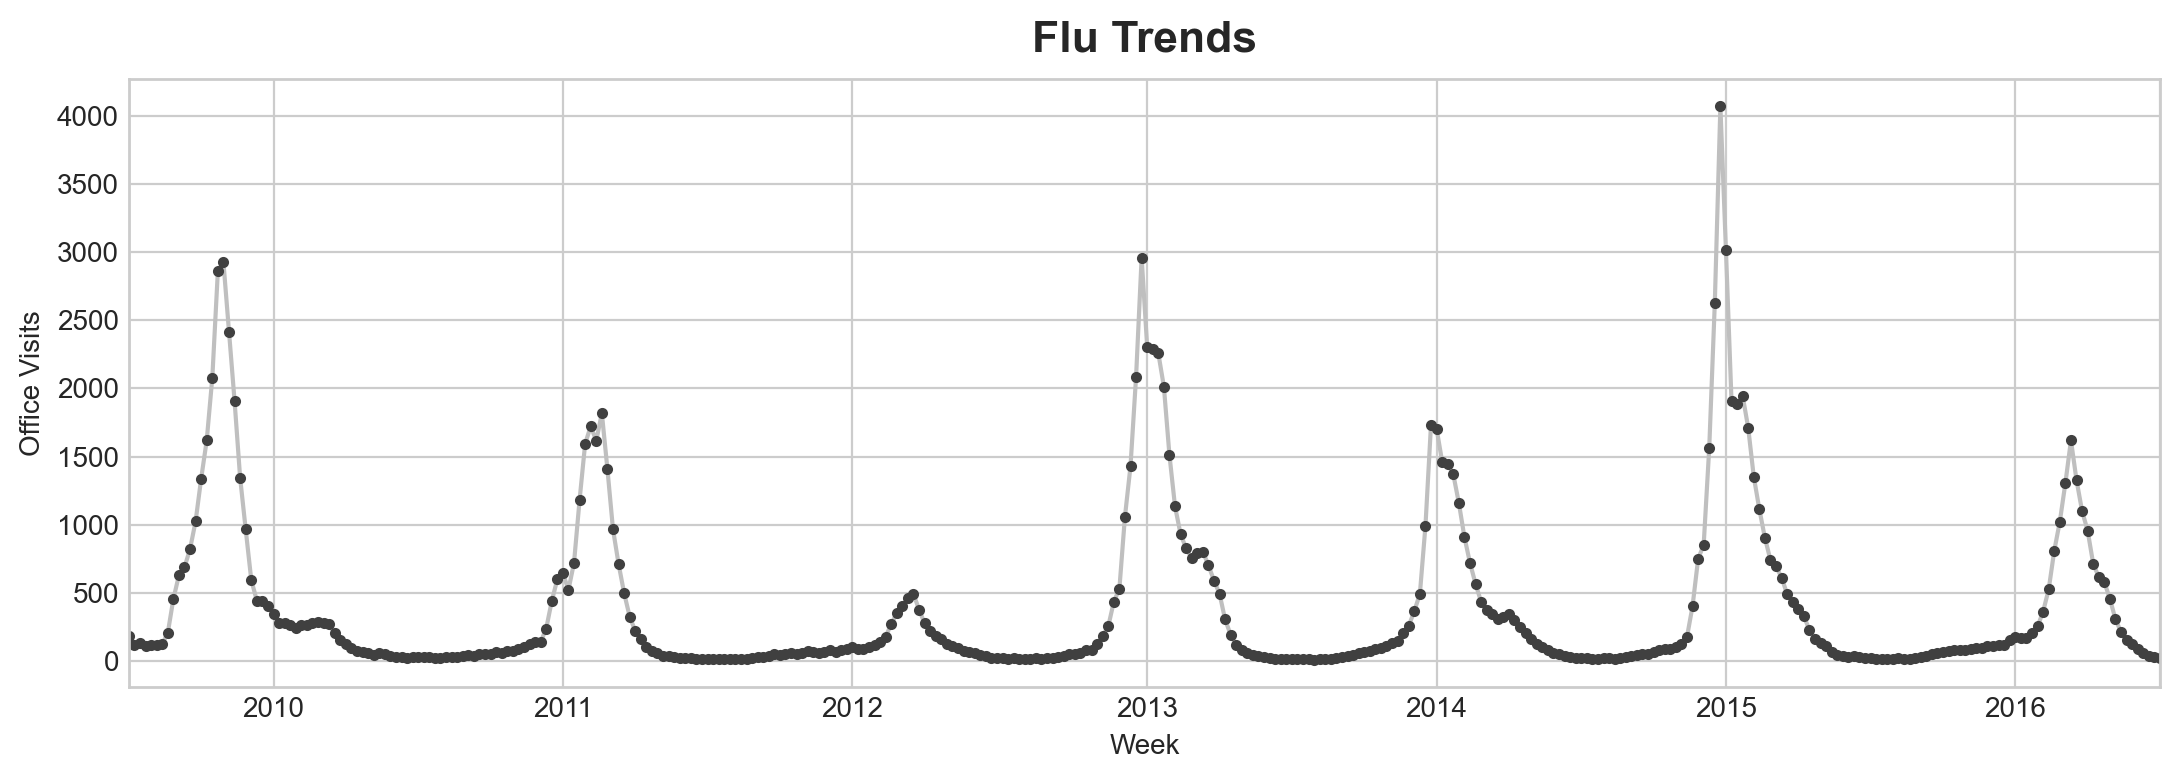

In [31]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


# data_dir = Path("../input/ts-course-data")
flu_trends = pd.read_csv("./data/flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

- flu trend 데이터는 불규칙한 사이클을 보여주고 있다 : 최정점은 매년마다 발생하고 있고, 가끔씩 빨리 나타나거나 늦게, 더 크게, 더 낮게 나타난다.
- 이 사이클들을 lag feature로 모델링하는 것은 변하는 조건을 다이나믹하게 반응할 수 있도록 해줄 것이다.


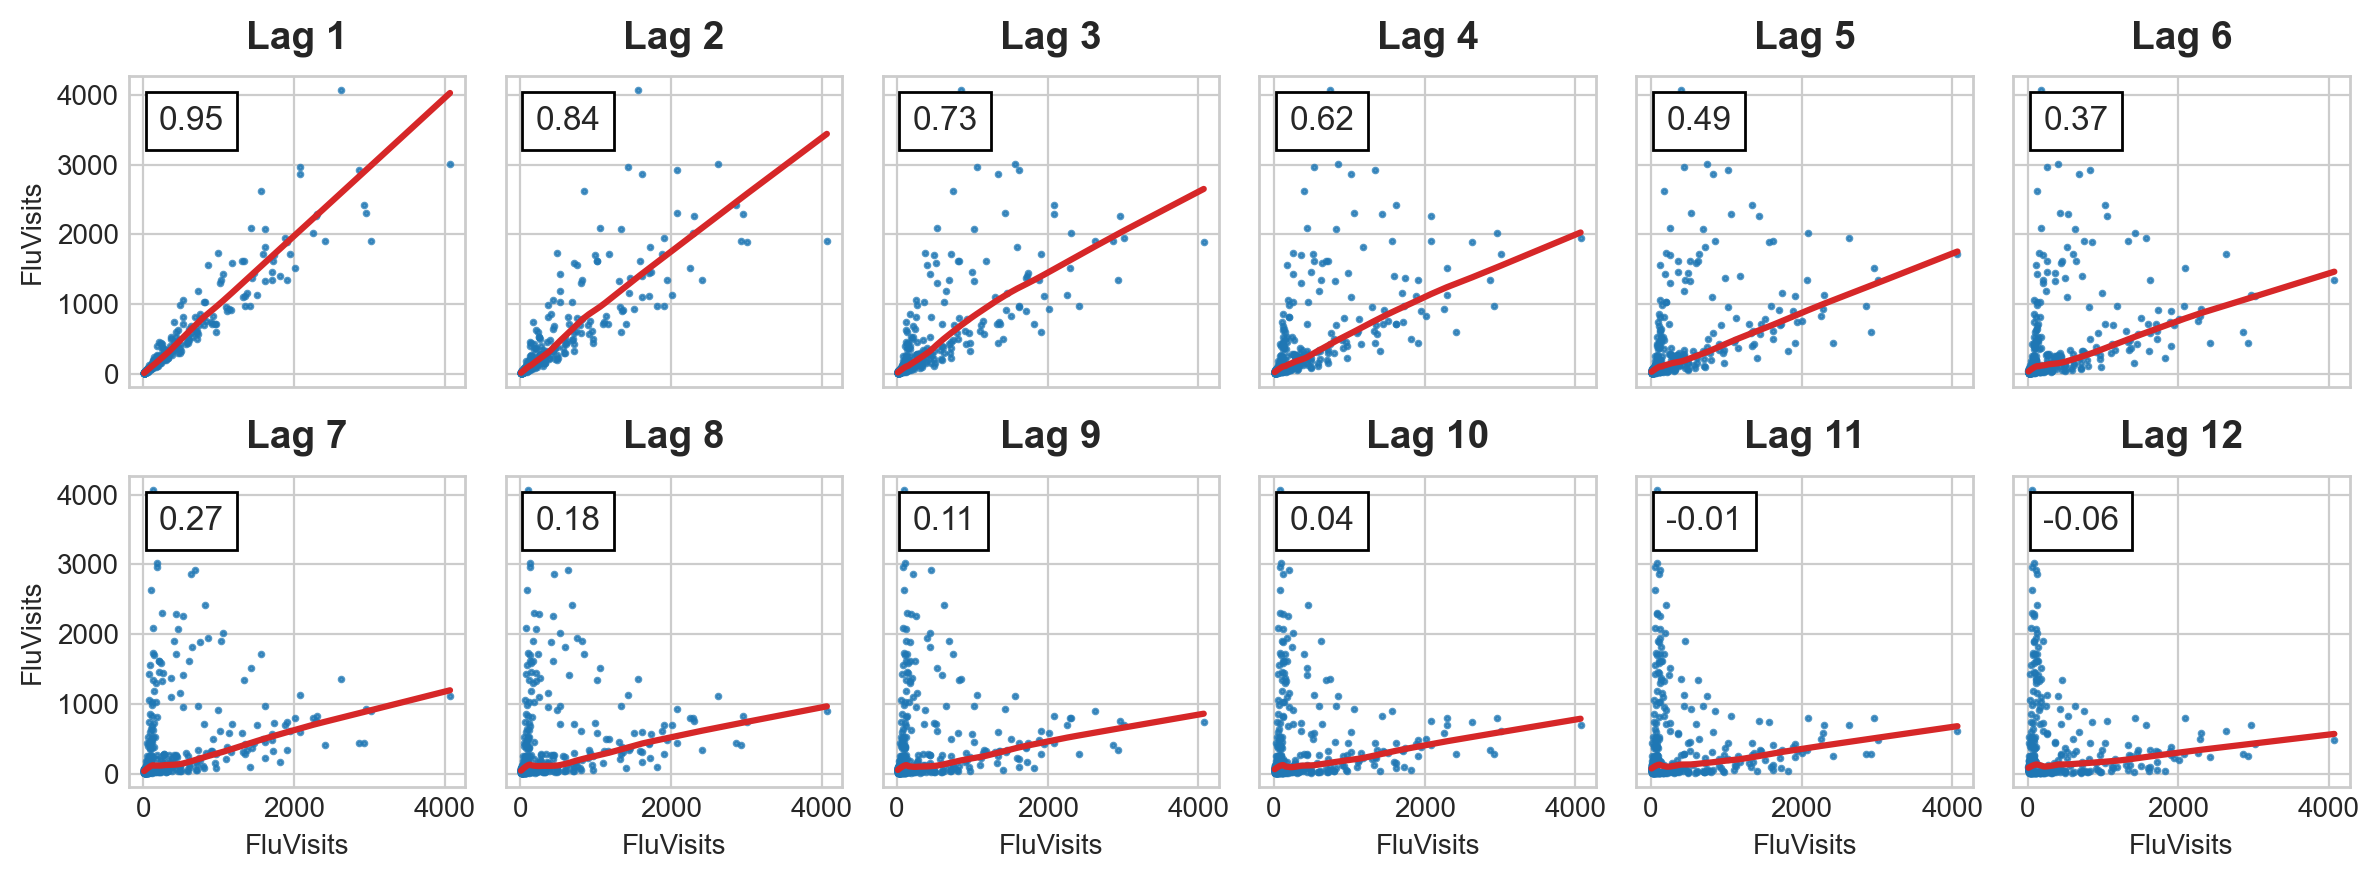

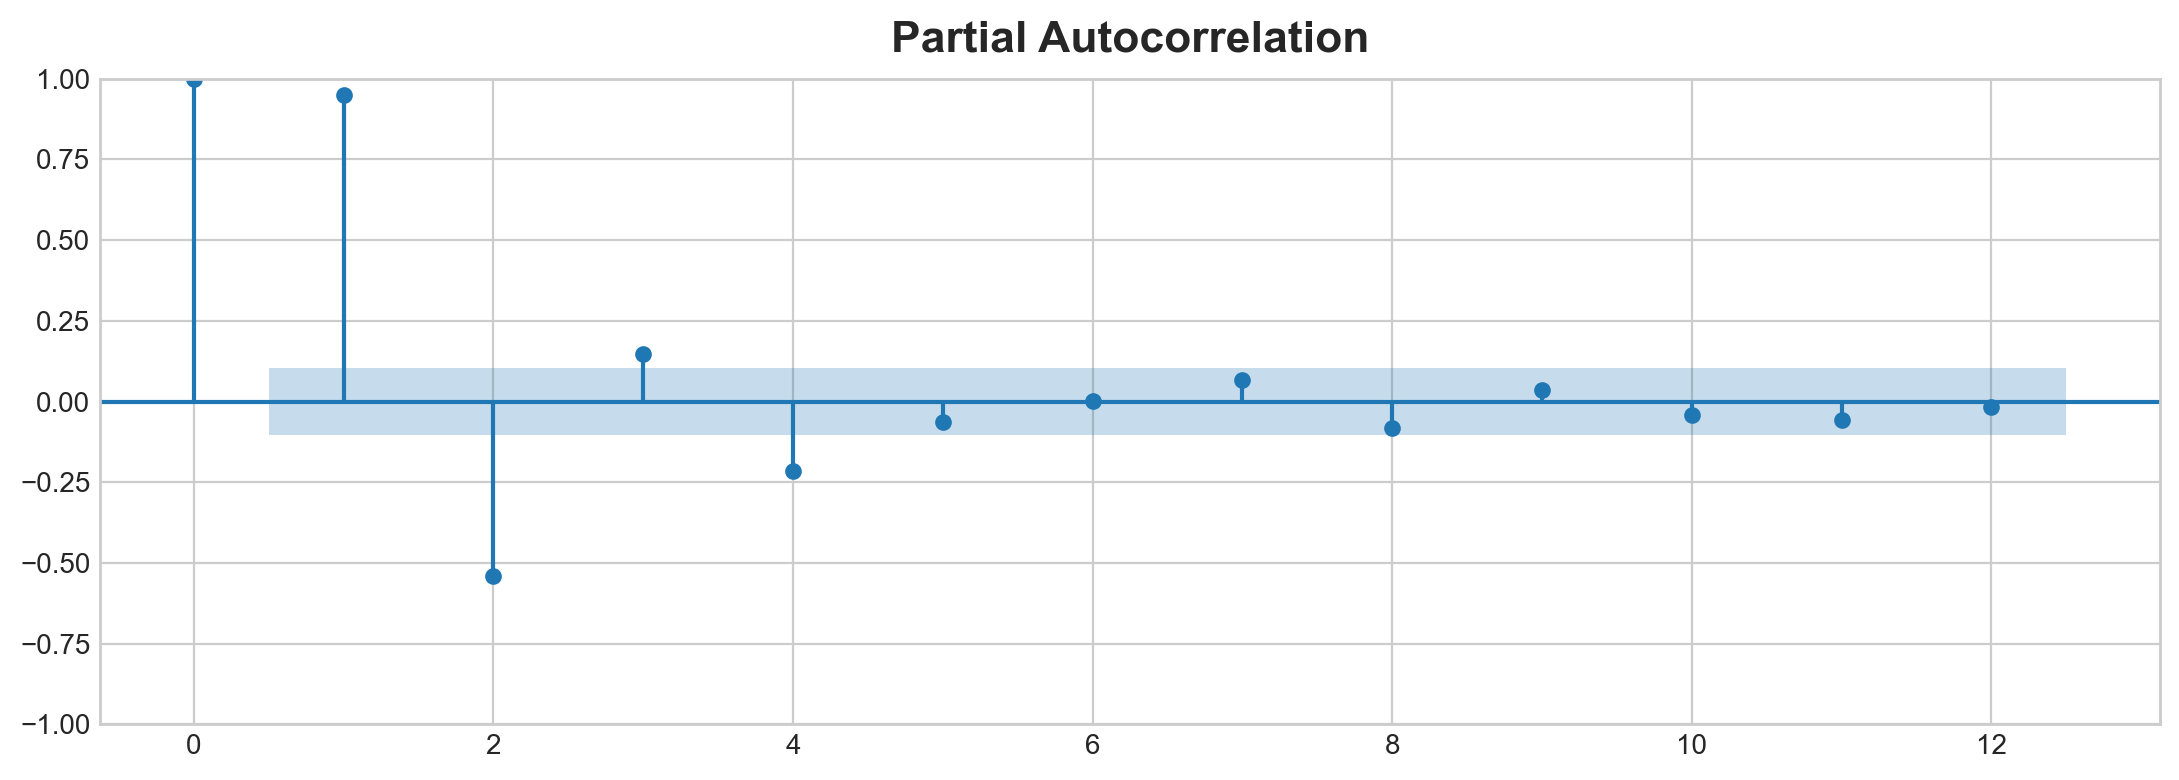

In [32]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

- lag plot을 보면 Fluvisits와 lag간의 관계를 보여준다. 
- partial autocorrelation은 dependence를 보여준다. 


In [33]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

- 전에, 우리는 훈련 데이터를 넘어 우리가 원하는 만큼 많은 steps을 forecast로 만들 수 있었다.
- 그러나 lag data를 사용할 때, 우리는 예측 구간이 제한된다(lag변수가 가능할 정도까지만)
- 이를 해결하는 방법은 lesson 6 때 다룰 것이다.

In [35]:
# create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)
# test_size 지정할 수 있구나 위에처럼

# Fit and predict
model = LinearRegression() # fit_intercept=True ' 우리는 deaterministicprocess를 사용하지 않기때문에

model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

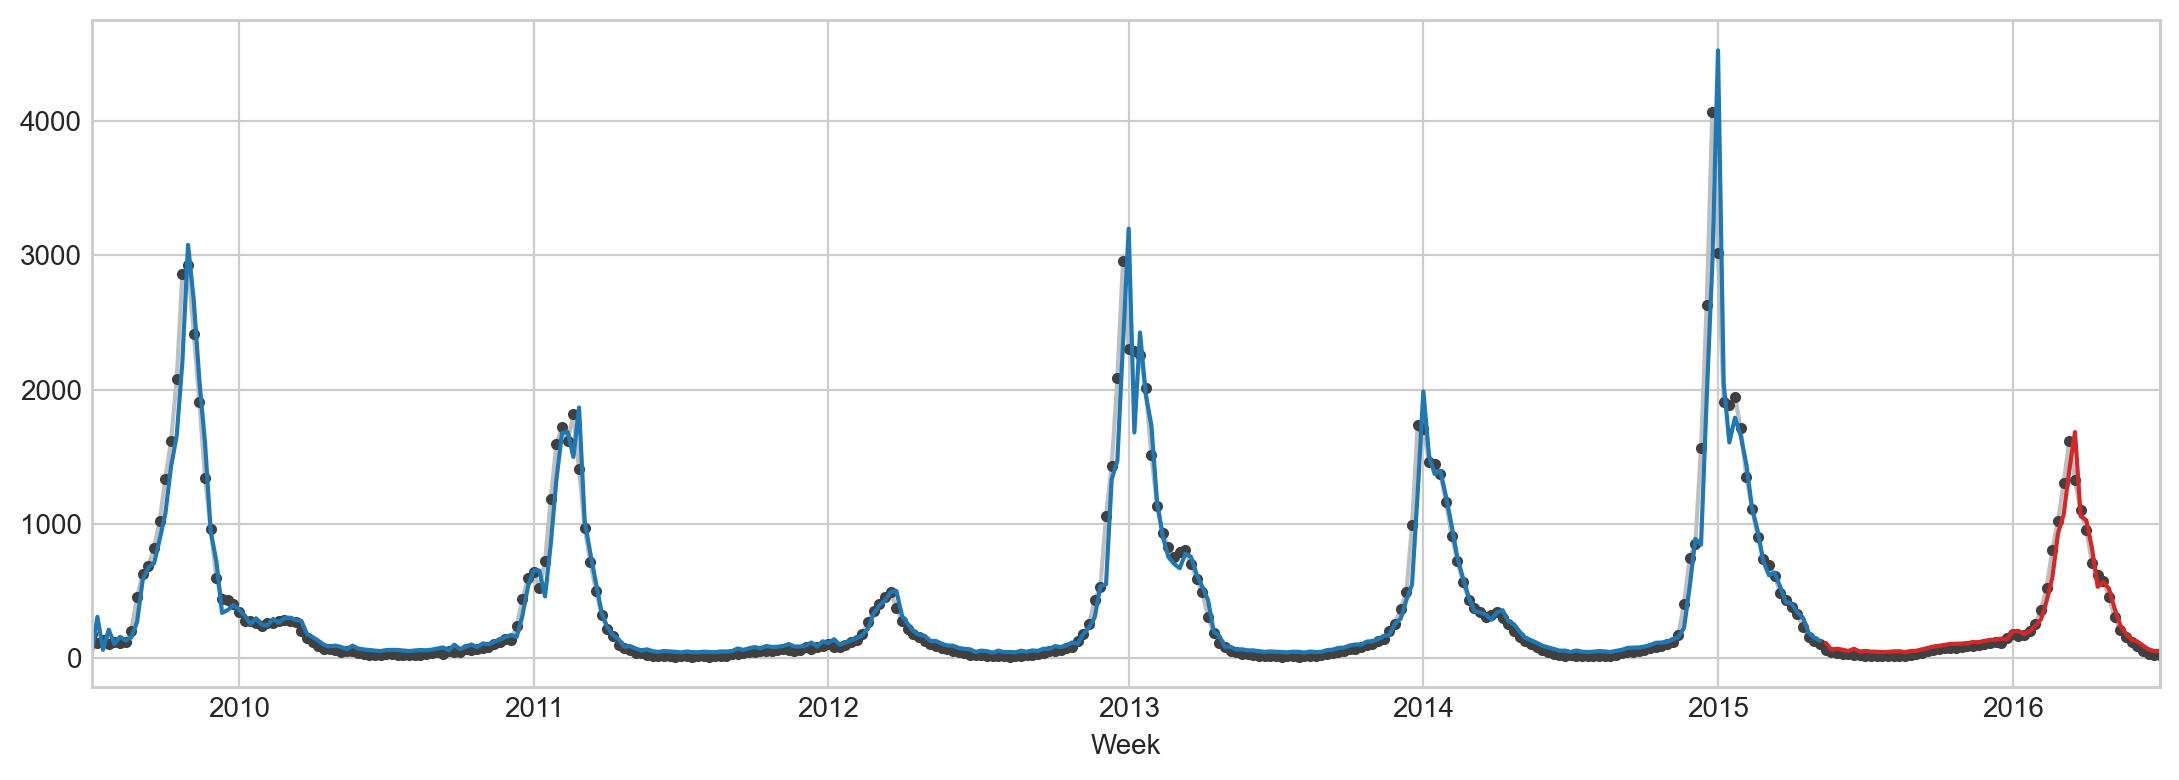

In [36]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

- forecast values를 보면, 우리는 타겟 시리즈에서 갑작스러운 변화에 반응할 teime step이 얼마나 필요한지를 볼 수 있다.

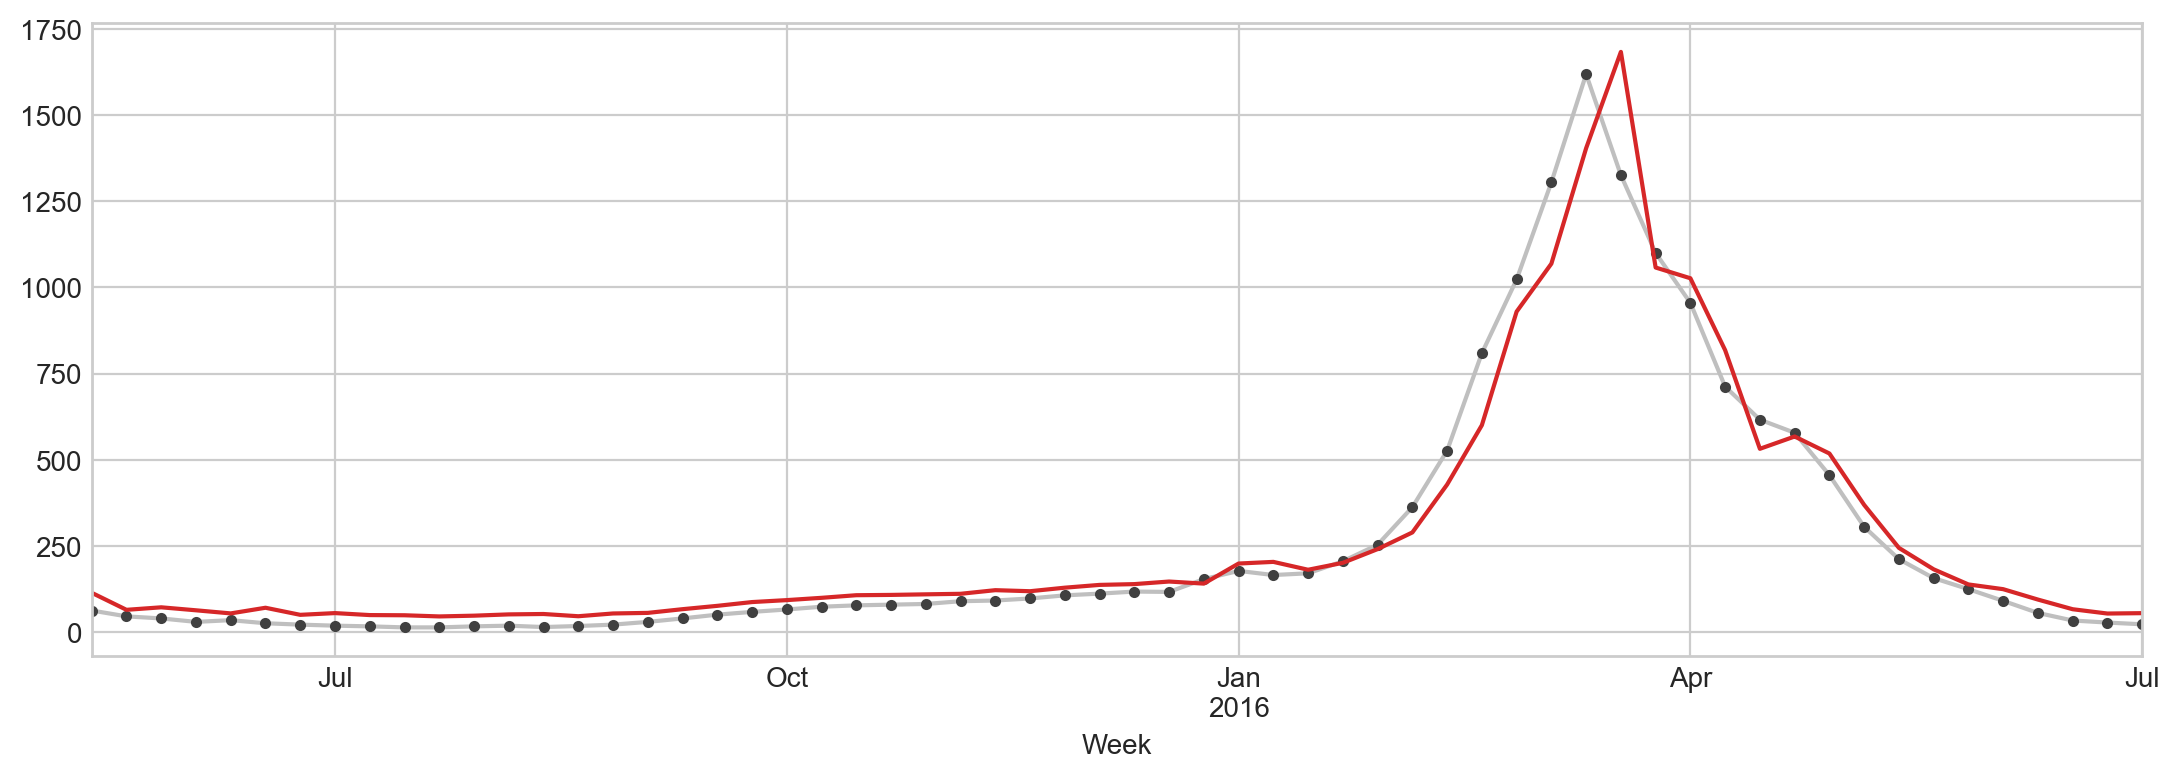

In [37]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color ='C3')

- 예측성능을 높이려면 우리는 선행 지수를 찾을 필요가 있다. 예를들면, flu의 변화에 조기 경보를 줄 수 있는 시계열을 찾아야한다.
- 우리의 두번째 접근으로, 우리는 training data에 구글 트렌드에서 측정된 flu 관련 용어들의 분포를 추가할 것이다.
- FluCough 검색어를 FluVisits에 대해 plotting 하는 것은 그 검색어가 선행지수가 될 수 있는지를 암시한다. flu-related 검색은 office visits에 선행해서 나타날 확률이 있다.

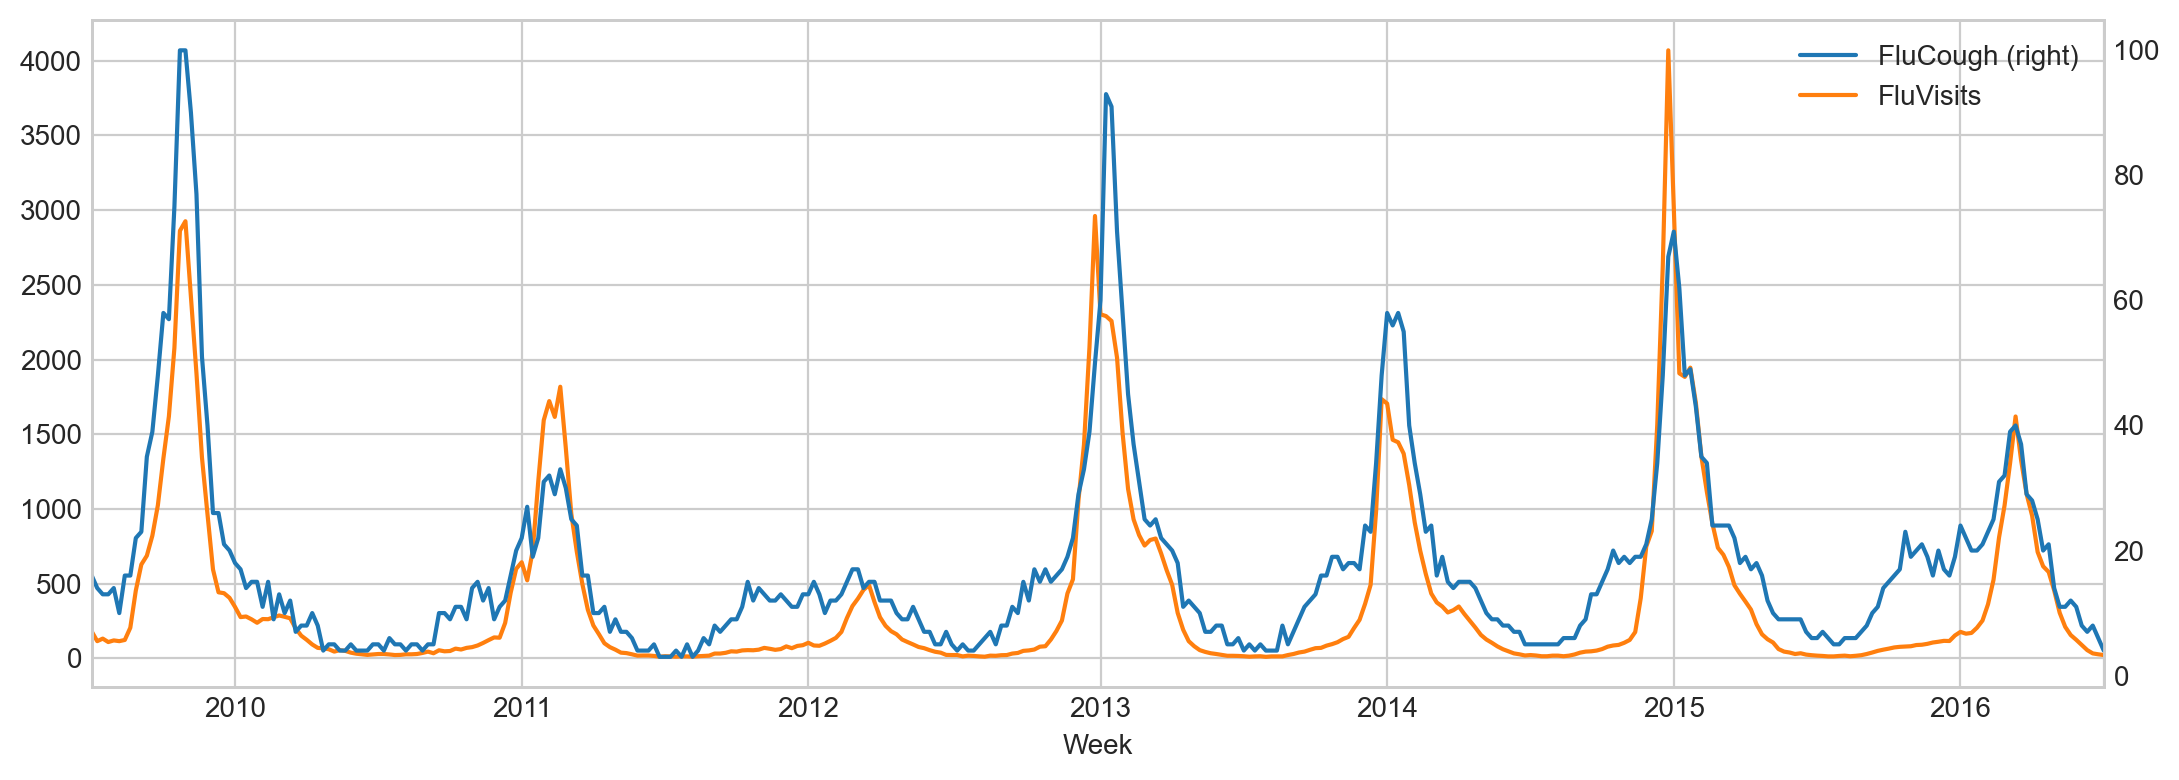

In [38]:
ax = flu_trends.plot(
    y = ['FluCough', 'FluVisits'],
    secondary_y = 'FluCough',
)

In [40]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags=3)

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

- 우리의 예측은 rougher하지만 우리의 모델은 갑작스러운 증가에 잘 대비하는 것으로 보인다.
- 마치 선행지수로서 효력을 잘 발휘하는 것을 암시하듯이

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# model = LinearRegression()
# model.fit(X_train, y_train) # train으로 학습시킨것을 뭐하러 예측하는지 이해안된다.
# y_pred = pd.Series(model.predict(X_train), index=y_train.index) 
# y_fore = pd.Series(model.predict(X_test), index=y_test.index)

# ax = y_test.plot(**plot_params)
# _ = y_fore.plot(ax=ax, color='C3')

# HyBrid Models
- 두개의 예측들의 강점을 종합
- XGBoost는 학습 상호작용에서 잘된다. 근데 트렌드를 예측하지 못한다.
- hybrid forecasters는 상호보완 학습 알고리즘과 다른쪽에서는 약한 부분을 다른 한쪽에서 강점을 채워준다.
- series = trend + seasons + cycles + error


### Components and Residuals
- 효과적인 hybrids를 디자인 하기위해, 우리는 시계열이 어떻게 구성되는지 이해할 필요가 있다.
- 우리는 dependence 패턴을 배워왔다. trend, seasons, cycles
- 여기 위에서 하나더가 있다. 바로 error
- series = trend + seasons + cycles + error
- 모델의 residuals는 차이이다. 모델이 trained 된 타겟과 모델이 예측한 prediction과의 차이
- 1) 먼저 트렌드를 학습하고 그것을 시리즈에서 뺀다.
- 2) 그다음 트렌드가 빠른 시리즈에서 계절성을 학습하고 계절성을 뺀다.
- 3) 그다움 순환을 학습하고 순환을 뺀다.
- 4) 결국 예측못하는 error 요소가 남는다.


Hybrid Forecasting with Residuals
- 이전까지는 우리는 하나의 알고리즘(linear regression)을 사용해서 한번에 모든 구성요소를 학습하는 과정을 이용했다.
- 하지만 하나의 알고리즘을 컴포넌트의 일부 그리고 나머지를 위한 또다른 알고리즘을 사용할 수 있다.
- 우리는 각각 컴포넌트에 최선의 알고리즘을 선택할 수 있다.
- 그러기 위해, 우리는 시리즈 원본을 학습시키기 위한 하나의 알고리즘을 사용하고 residual series를 학습시키는 두번째 알고리즘을 사용하자

<!-- # 1. Train and predict with first model
model_1.fit(X_train_1, y_train)
y_pred_1 = model_1.predict(X_train)

# 2. Train and predict with second model on residuals
model_2.fit(X_train_2, y_train - y_pred_1)
y_pred_2 = model_2.predict(X_train_2)

# 3. Add to get overall predictions
y_pred = y_pred_1 + y_pred_2
 -->


In [50]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor


simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)


industries = ["BuildingMaterials", "FoodAndBeverage"]
retail = pd.read_csv("./data/us-retail-sales.csv",
    usecols=['Month'] + industries,
    parse_dates=['Month'],
    index_col='Month',
).to_period('D').reindex(columns=industries)
retail = pd.concat({'Sales': retail}, names=[None, 'Industries'], axis=1)

retail.head()

Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01              8964           29589
1992-02-01              9023           28570
1992-03-01             10608           29682
1992-04-01             11630           30228
1992-05-01             12327           31677

- 처음엔 linear regression 모델을 사용해서 각 시리즈의 트렌드를 학습해보자.
- demonstration을 위해, 우리는 order가 2개인 트렌드를 사용할 것이다.


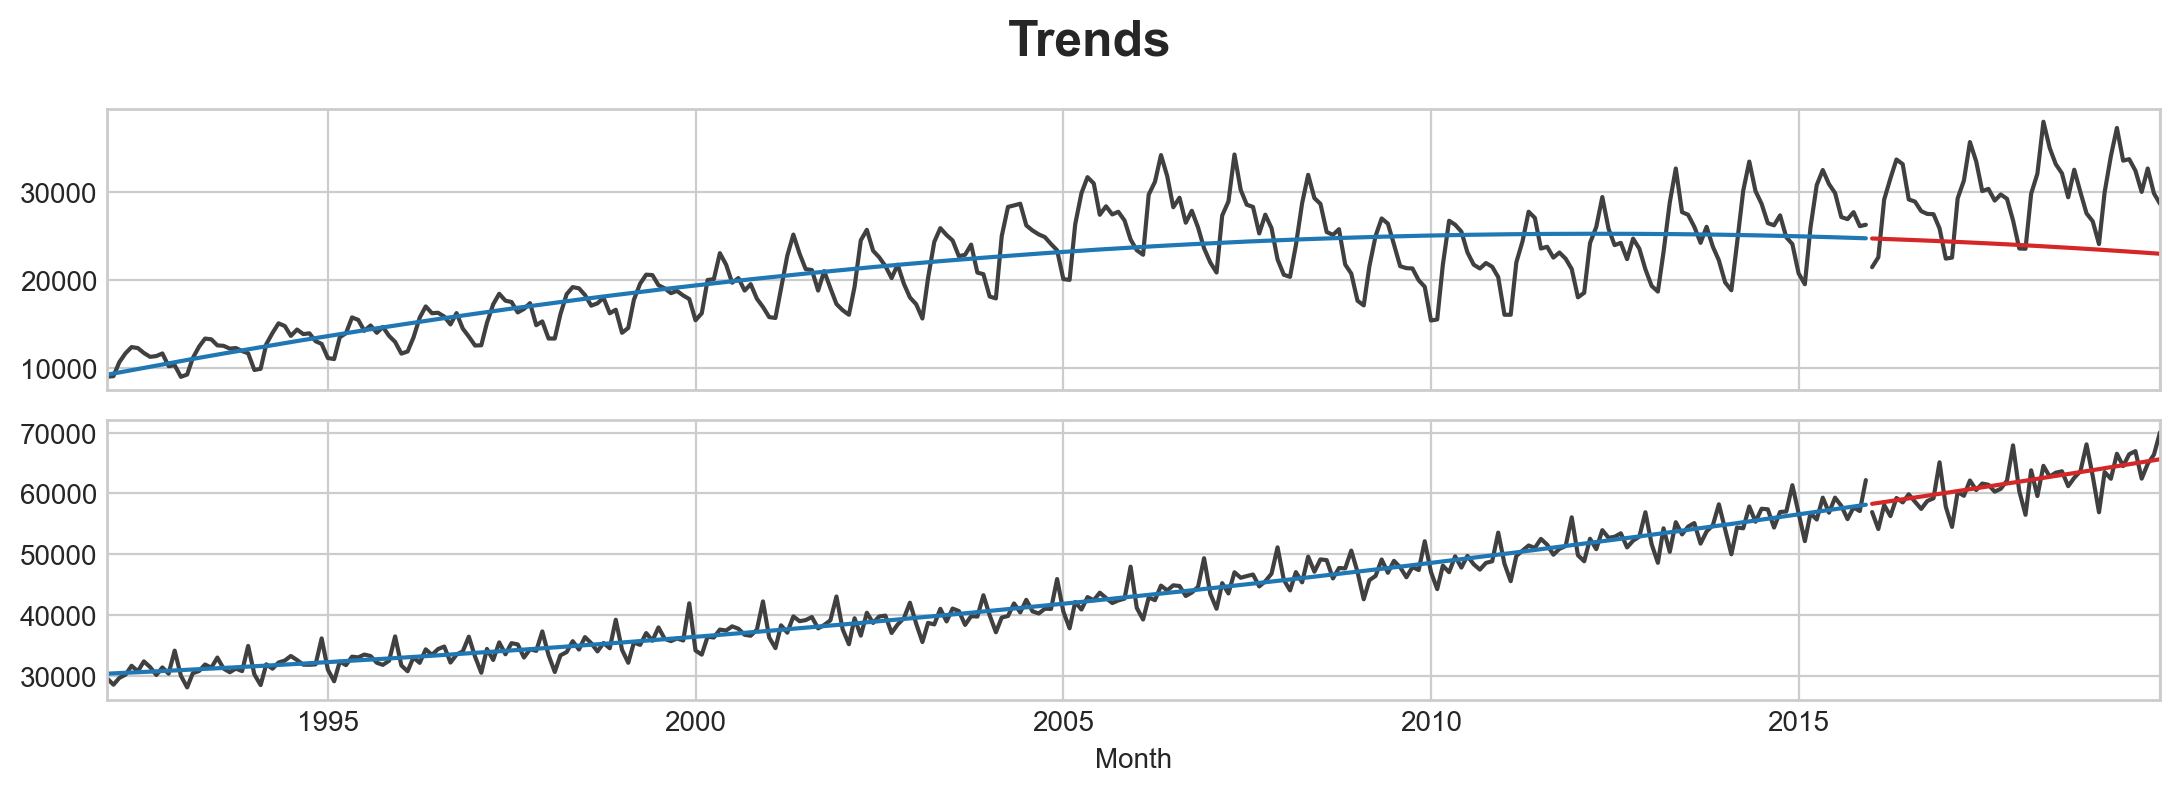

In [51]:
y = retail.copy()

# Create trend features
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=2,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample()  # features for the training data

# Test on the years 2016-2019. It will be easier for us later if we
# split the date index instead of the dataframe directly.
idx_train, idx_test = train_test_split(
    y.index, test_size=12 * 4, shuffle=False,
)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

# Fit trend model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)

# Plot
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

In [52]:
# The `stack` method converts column labels to row labels, pivoting from wide format to long
X = retail.stack()  # pivot dataset wide to long
display(X.head())
y = X.pop('Sales')  # grab target series

Sales
Month      Industries              
1992-01-01 BuildingMaterials   8964
           FoodAndBeverage    29589
1992-02-01 BuildingMaterials   9023
           FoodAndBeverage    28570
1992-03-01 BuildingMaterials  10608

In [53]:
# Turn row labels into categorical feature columns with a label encoding
X = X.reset_index('Industries')
# Label encoding for 'Industries' feature
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()

# Label encoding for annual seasonality
X["Month"] = X.index.month  # values are 1, 2, ..., 12

# Create splits
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

In [54]:
# Pivot wide to long (stack) and convert DataFrame to Series (squeeze)
y_fit = y_fit.stack().squeeze()    # trend from training set
y_pred = y_pred.stack().squeeze()  # trend from test set

# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit

# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_fit
y_pred_boosted = xgb.predict(X_test) + y_pred

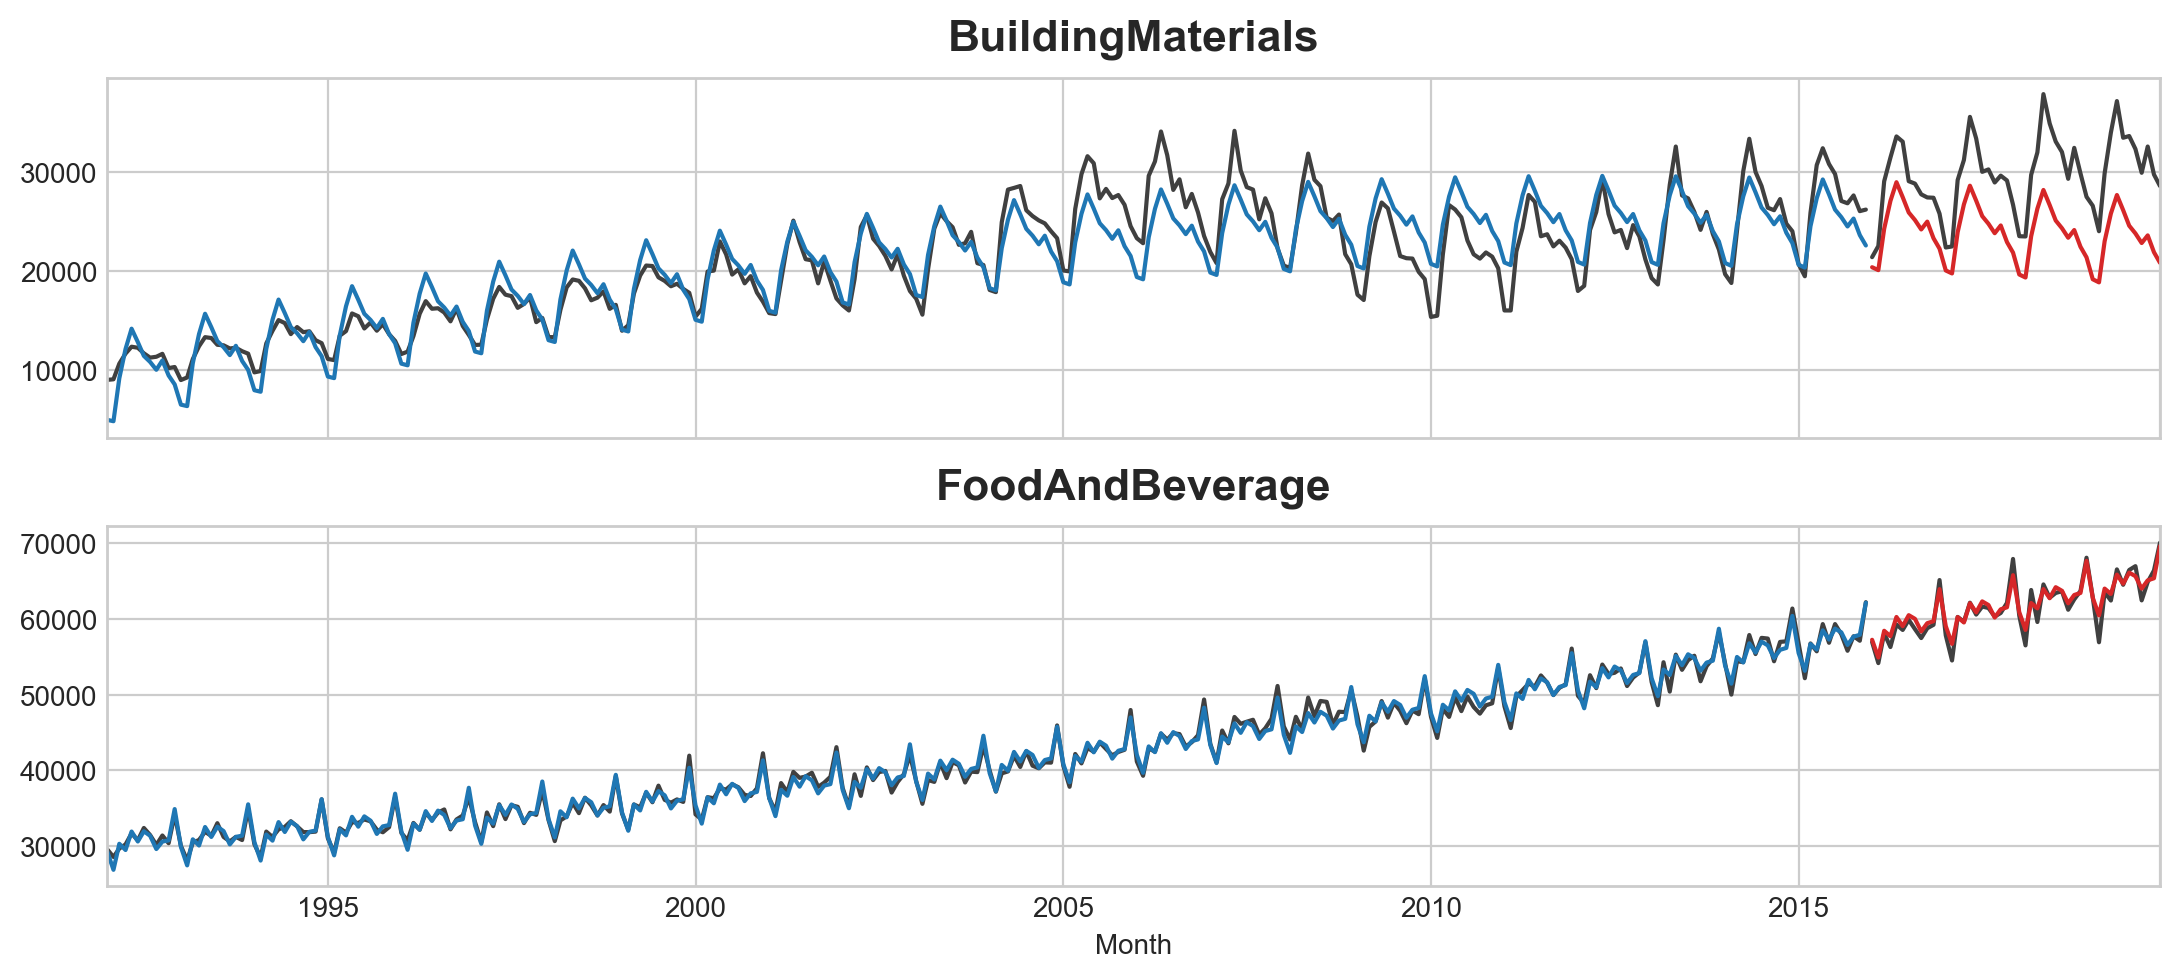

In [55]:
axs = y_train.unstack(['Industries']).plot(
    color='0.25', figsize=(11, 5), subplots=True, sharex=True,
    title=['BuildingMaterials', 'FoodAndBeverage'],
)
axs = y_test.unstack(['Industries']).plot(
    color='0.25', subplots=True, sharex=True, ax=axs,
)
axs = y_fit_boosted.unstack(['Industries']).plot(
    color='C0', subplots=True, sharex=True, ax=axs,
)
axs = y_pred_boosted.unstack(['Industries']).plot(
    color='C3', subplots=True, sharex=True, ax=axs,
)
for ax in axs: ax.legend([])

# Forecasting with machine Learning

<pre>
예측과제를 정의하기 전에
1) 그 시간대에 어떤 정보가 가능한지(변수)
2) 시간대(너가 예측하고자 하는 타겟 시리즈)

forecast origin은 예측하려고할때 시간대이다. 
forecast horizon은 예측하고자 하는 시간대이다.
origin과 horizon 사이는 lead time이다.(latency)
예측의 lead time은 origin에서 horizon까지의 step 개수이다.


- 데이터프레임에서 각각의 row는 single forecast를 의미한다.
- row의 time index는 forecast horizon에서의 첫번째 시간이지만 우리는 같은 row에 전체 horizon을 위한 value를 배열시킨다.
- 데이터프레임에서의 각각 row는 single forecast를 의미한다. 

In [65]:
import numpy as np
import pandas as pd
N = 20
ts = pd.Series(
    np.arange(N),
    index = pd.period_range(start='2010', freq='A', periods=N,name='Year'),
    dtype=pd.Int8Dtype,
)


# Lag features
X = pd.DataFrame({
    'y_lag_2':ts.shift(2),
    'y_lag_3':ts.shift(3),
    'y_lag_4':ts.shift(4),
    'y_lag_5':ts.shift(5),
    'y_lag_6':ts.shift(6),
})


# Multistep targets
y=pd.DataFrame({
    'y_step_3':ts.shift(-2),
    'y_step_2':ts.shift(-1),
    'y_step_1':ts,
})


data = pd.concat({'Targets':y, 'Features':X}, axis=1)

data.head(10).style.set_properties(['Targets'], **{'background-color':'LavenderBlush'}).set_properties(['Features'], **{'background-color':'Lavender'})

In [63]:
ts

Year
2010     0
2011     1
2012     2
2013     3
2014     4
2015     5
2016     6
2017     7
2018     8
2019     9
2020    10
2021    11
2022    12
2023    13
2024    14
2025    15
2026    16
2027    17
2028    18
2029    19
Freq: A-DEC, dtype: object

In [61]:
X

,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6
Year,,,,,
2010,None,None,None,None,None
2011,None,None,None,None,None
2012,0,None,None,None,None
2013,1,0,None,None,None
2014,2,1,0,None,None
2015,3,2,1,0,None
2016,4,3,2,1,0
2017,5,4,3,2,1
2018,6,5,4,3,2


In [62]:
y

,y_step_3,y_step_2,y_step_1
Year,,,
2010,2,1,0
2011,3,2,1
2012,4,3,2
2013,5,4,3
2014,6,5,4
2015,7,6,5
2016,8,7,6
2017,9,8,7
2018,10,9,8


In [66]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

simplefilter("ignore")


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax


# data_dir = Path("../input/ts-course-data")
flu_trends = pd.read_csv("data/flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

In [67]:
flu_trends

,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,...,16,6,9,24,28,25,25,25,9,132
2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,15,...,8,5,12,21,26,26,29,24,13,109
2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,15,...,8,8,12,33,29,21,27,30,9,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30/2016-06-05,5,46,50,29,31,37,33,17,9,3,...,7,3,6,30,17,4,53,41,7,90
2016-06-06/2016-06-12,5,47,49,21,24,36,35,19,8,4,...,5,3,5,33,18,3,52,42,6,55
2016-06-13/2016-06-19,4,47,48,21,22,34,32,15,8,3,...,6,2,6,37,16,3,54,38,3,33


In [74]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

# Four weeks of lag features
y = flu_trends.FluVisits.copy()
X = make_lags(y, lags=4).fillna(0.0)


def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)

# Eight-week forecast
y = make_multistep_target(y, steps=8).dropna()

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)

In [70]:
X

,y_lag_1,y_lag_2,y_lag_3,y_lag_4
Week,,,,
2009-06-29/2009-07-05,0.0,0.0,0.0,0.0
2009-07-06/2009-07-12,180.0,0.0,0.0,0.0
2009-07-13/2009-07-19,115.0,180.0,0.0,0.0
2009-07-20/2009-07-26,132.0,115.0,180.0,0.0
2009-07-27/2009-08-02,109.0,132.0,115.0,180.0
...,...,...,...,...
2016-05-30/2016-06-05,124.0,156.0,211.0,305.0
2016-06-06/2016-06-12,90.0,124.0,156.0,211.0
2016-06-13/2016-06-19,55.0,90.0,124.0,156.0


In [71]:
y

Week
2009-06-29/2009-07-05    180
2009-07-06/2009-07-12    115
2009-07-13/2009-07-19    132
2009-07-20/2009-07-26    109
2009-07-27/2009-08-02    120
                        ... 
2016-05-30/2016-06-05     90
2016-06-06/2016-06-12     55
2016-06-13/2016-06-19     33
2016-06-20/2016-06-26     27
2016-06-27/2016-07-03     22
Freq: W-SUN, Name: FluVisits, Length: 366, dtype: int64

In [73]:
y

,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5,y_step_6,y_step_7,y_step_8
Week,,,,,,,,
2009-06-29/2009-07-05,180,115.0,132.0,109.0,120.0,115.0,123.0,205.0
2009-07-06/2009-07-12,115,132.0,109.0,120.0,115.0,123.0,205.0,454.0
2009-07-13/2009-07-19,132,109.0,120.0,115.0,123.0,205.0,454.0,628.0
2009-07-20/2009-07-26,109,120.0,115.0,123.0,205.0,454.0,628.0,687.0
2009-07-27/2009-08-02,120,115.0,123.0,205.0,454.0,628.0,687.0,821.0
...,...,...,...,...,...,...,...,...
2016-04-11/2016-04-17,616,578.0,455.0,305.0,211.0,156.0,124.0,90.0
2016-04-18/2016-04-24,578,455.0,305.0,211.0,156.0,124.0,90.0,55.0
2016-04-25/2016-05-01,455,305.0,211.0,156.0,124.0,90.0,55.0,33.0


In [77]:
y

,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5,y_step_6,y_step_7,y_step_8
Week,,,,,,,,
2009-06-29/2009-07-05,180,115.0,132.0,109.0,120.0,115.0,123.0,205.0
2009-07-06/2009-07-12,115,132.0,109.0,120.0,115.0,123.0,205.0,454.0
2009-07-13/2009-07-19,132,109.0,120.0,115.0,123.0,205.0,454.0,628.0
2009-07-20/2009-07-26,109,120.0,115.0,123.0,205.0,454.0,628.0,687.0
2009-07-27/2009-08-02,120,115.0,123.0,205.0,454.0,628.0,687.0,821.0
...,...,...,...,...,...,...,...,...
2016-04-11/2016-04-17,616,578.0,455.0,305.0,211.0,156.0,124.0,90.0
2016-04-18/2016-04-24,578,455.0,305.0,211.0,156.0,124.0,90.0,55.0
2016-04-25/2016-05-01,455,305.0,211.0,156.0,124.0,90.0,55.0,33.0
